In [1]:
from read_and_prepare_data import read_and_prepare_data
from set_path import set_path
from selected_cols import selected_cols
from create_shap_values_via_xgboost import create_shap_values_via_xgboost
from print_examples import show_all_results, create_party_results, show_one_results, cluster_dedndogram, compare_scatter
from set_path import set_path
from read_and_prepare_data import read_and_prepare_data
from load_thl_data import read_covid



In [2]:
mainpath, path = set_path('areadata')
stat, post, kunta_stat, vaalidata = read_and_prepare_data(path)
numeric_features, categorical_features = selected_cols(largeset=False, parties=False, pnroalue = False)
kunta_stat = read_covid(kunta_stat)


read_and_prepare_data  read from file


In [3]:
numeric_features = ['Pientaloasunnot, 2018 (RA) osuudesta asukkaat',
  'Kasvatus- ja perheneuvoloiden lapsiasiakkaat (0 - 21-vuotiaat) vuoden aikana, % vastaavanikäisestä väestöstä, kunnan kustantamat palvelut (Terveyden ja hyvinvoinnin laitos (THL) 2019)',
  'Ylimpään tuloluokkaan kuuluvat taloudet, 2017 (TR) osuudesta taloudet',
  'Vastaanotetut pakolaiset / 100 000 asukasta (Työ- ja elinkeinoministeriö (TEM) 2019)',
  'Hoitopäivät ympärivuorokautisen hoidon sisältävässä sosiaalitoimen yksikössä 75 vuotta täyttäneillä / 1 000 vastaavanikäistä (Terveyden ja hyvinvoinnin laitos (THL) 2018)',
  'Pienhiukkaspitoisuuden väestöpainotettu vuosikeskiarvo (2015) (Terveyden ja hyvinvoinnin laitos (THL) 2015)',
  'Asukkaiden ostovoimakertymä, 2017 (HR) osuudesta asukkaat osuus total',
  'Työlliset, 2017 (PT) osuudesta asukkaat',
  'Kokeillut kannabista vähintään kaksi kertaa, % lukion 1. ja 2. vuoden opiskelijoista (Terveyden ja hyvinvoinnin laitos (THL) 2019)',
  'Asumisväljyys, 2018 (TE) osuus total',
  '14.7 Kotitalousvähennys Yhteensä Summa, euroa osuus total',
  'Ylioppilastutkinnon suorittaneet, 2018 (KO) osuudesta asukkaat',
  '4.2.7 Päivä- ja äitiyspäivärahat Yhteensä Saajien lukumäärä osuudesta verotetut',
  'Aikuisten mielenterveyden avohoitokäynnit / 1 000 18 vuotta täyttänyttä (Terveyden ja hyvinvoinnin laitos (THL) 2019)',
  'J Informaatio ja viestintä, 2017 (TP) osuudesta asukkaat',
  'Synnyttäneisyys / 1 000 15 - 49-vuotiasta naista (Terveyden ja hyvinvoinnin laitos (THL) 2018)',
  'Tosi humalassa vähintään kerran kuukaudessa, % 8. ja 9. luokan oppilaista (Terveyden ja hyvinvoinnin laitos (THL) 2019)',
  'Keskimmäiseen tuloluokkaan kuuluvat taloudet, 2017 (TR) osuudesta taloudet',
  '14.12 Opintolainavähennys Yhteensä Summa, euroa osuus total',
  'Perusterveydenhuollon avohoidon lääkärikäynnit (kaikki yhteystavat) / 1 000 asukasta (Terveyden ja hyvinvoinnin laitos (THL) 2019)',
  'R Taiteet, viihde ja virkistys, 2017 (TP) osuudesta asukkaat',
  '1.1.3 Kirkollisvero Yhteensä Saajien lukumäärä osuudesta verotetut',
  'Raskaudenkeskeytykset alle 25-vuotiailla / 1 000 15 - 24-vuotiasta naista (Terveyden ja hyvinvoinnin laitos (THL) 2019)',
  '5. Pääomatulot yhteensä Yhteensä Summa, euroa osuus total',
  'Opiskelijat, 2017 (PT) osuudesta asukkaat',
  'Ulkomaan kansalaisten osuus väestöstä, %, 2019',
  'Täydentävää toimeentulotukea vuoden aikana saaneet 18 - 24-vuotiaat, % vastaavanikäisestä väestöstä (Terveyden ja hyvinvoinnin laitos (THL) 2019)',
  'Talotyypit yhteensä 2019 Neliöhinta (EUR/m2) osuus total',
  '4.2.6 Tapaturma- ym. muut päivärahat Yhteensä Saajien lukumäärä osuudesta verotetut',
  'Kesämökit yhteensä, 2018 (RA) osuudesta asukkaat',
  'Sairaalassa hoitoa saaneiden 25 - 64-vuotiaiden hoitopäivät / 1 000 vastaavanikäistä (Terveyden ja hyvinvoinnin laitos (THL) 2018)',
  'Miehet, 2018 (HE) osuudesta asukkaat',
  'Perusterveydenhuollon avohoidon lääkärikäynnit ilta-, yö-, viikonloppu- ja juhlapyhäpäivystykseen / 1 000 asukasta (-2010) (Terveyden ja hyvinvoinnin laitos (THL) 2010)',
  'A Maatalous, metsätalous ja kalatalous, 2017 (TP) osuudesta asukkaat',
  'Tupakoi päivittäin, % 8. ja 9. luokan oppilaista (Terveyden ja hyvinvoinnin laitos (THL) 2019)',
  'Alkoholijuomien myynti asukasta kohti 100 %:n alkoholina, litraa (Terveyden ja hyvinvoinnin laitos (THL) 2019)',
  'Osa-aikaiseen varhaiskasvatukseen 31.12. osallistuneet 1 - 2-vuotiaat, % vastaavanikäisestä väestöstä, kunnan kustantamat palvelut (Terveyden ja hyvinvoinnin laitos (THL) 2019)',
  'Täyttä kansaneläkettä saaneet 65 vuotta täyttäneet, % vastaavanikäisestä väestöstä (Kansaneläkelaitos (Kela) 2019)',
  '5.1.3 Vuokratulo Yhteensä Saajien lukumäärä osuudesta verotetut',
  'P Koulutus, 2017 (TP) osuudesta asukkaat',
  'Yksityisten lääkäripalvelujen käynnit (psykiatriat) / 1 000 asiakasta (Kansaneläkelaitos (Kela) 2019)',
  'K Rahoitus- ja vakuutustoiminta, 2017 (TP) osuudesta asukkaat',
  '0 - 17-vuotiaat lapset, joista on tehty lastensuojeluilmoitus, % vastaavanikäisestä väestöstä (THL) (Terveyden ja hyvinvoinnin laitos (THL) 2019)',
  'Varhaiskasvatukseen 31.12. osallistuneet 1 - 5-vuotiaat, % vastaavanikäisestä väestöstä, kunnan kustantamat palvelut (Terveyden ja hyvinvoinnin laitos (THL) 2019)',
  'Nuorten yksinasuvien taloudet, 2018 (TE) osuudesta taloudet',
  'Keskimääräinen eläkkeelle siirtymisikä (Eläketurvakeskus (ETK) 2018)',
  '4.2 Työmatkakulujen perusteella palkkatulosta vähennettävä määrä (TVL 93 §) Yhteensä Summa, euroa osuus total',
  'Asunnottomat yksin asuvat / 1 000 asukasta (-2017) (Asumisen rahoitus- ja kehittämiskeskus (ARA) 2017)',
  'Klamydiainfektioita / 100 000 asukasta (Terveyden ja hyvinvoinnin laitos (THL) 2018)',
  'Asuntojen keskipinta-ala, 2018 (RA) osuus total',
  'Nuorten raskaudet (alle 25-vuotiaat) / 1 000 15 - 24-vuotiasta naista (Terveyden ja hyvinvoinnin laitos (THL) 2018)',
  'Kuntien välinen muuttovoitto/-tappio, henkilöä, 2019',
  'Ruotsinkielisten osuus väestöstä, %, 2019',
  'Taajama-aste, %, 2018',
  'Henkilöautot Liikennekäytössä 2019 osuudesta asukkaat',
  'Harvaan asutulla maaseudulla asuvien osuus, % 2019',
  'Kaupungin kehysalueella asuvien osuus, % 2019',
  'Kaupungin läheisellä maaseudulla asuvien osuus, % 2019',
  'Maaseudun paikalliskeskuksissa asuvien osuus, % 2019',
  'Sisemmällä kaupunkialueella asuvien osuus, % 2019',
  'Väkiluvun muutos, % 2019',
  'Ydinmaaseudulla asuvien osuus, % 2019']

In [4]:
#set values to feature engineering attributes

filename = "covid_xgboost_real"
test_size = 0.25
metric = 'rmse'
Skfold=False
Verbose = False
testing=False
scaled = False

initial_params = {
        #Initial xgboost parameters to be automatically tuned
        'objective':'reg:squarederror',
        'booster' : 'gbtree',
        'eval_metric' : metric,
        'seed' : 42,
        }

categorical_features=[]


target = ['Covid_ilmaantuvuus']
removeset = set(target)
numeric_features[:] = [x for x in numeric_features if x not in removeset]

In [5]:
data, X, y, test, X_test, y_test_pred, model_list, model_params, shap_data, features_dict, selected_columns_dict = create_shap_values_via_xgboost(path,
                               filename,
                               kunta_stat,
                               kunta_stat,
                               target,
                               initial_params,
                               numeric_features=numeric_features,
                               categorical_features=categorical_features,
                               scaled=scaled,
                               test_size=test_size,
                               Skfold=Skfold,
                               Verbose=False,
                               testing=testing)
   

Covid_ilmaantuvuus
Initial parameters:
{'objective': 'reg:squarederror', 'booster': 'gbtree', 'eval_metric': 'rmse', 'seed': 42}

[0]	train-rmse:11.88539	test-rmse:15.82374
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[11]	train-rmse:1.71249	test-rmse:12.59632

for real
Unoptimized xgb.cv params xgb.cv params: rmse: 11.124014800000001
Best xgb.cv params: max_depth 7, min_child_weight 3, rmse: 9.7357476
Best xgb.cv params: lambda 0.48, alpha 0.4, rmse: 9.242663400000001
Best xgb.cv params: colsample_bytree 1.0, subsample 1.0, rmse: 9.242663400000001
Best xgb.cv params: eta 0.3, rmse: 9.242663400000001
Best xgb.cv params: scale_pos_weight 0.0, rmse: 9.242663400000001
Best xgb.cv params: gamma 0.04, rmse: 9.239688399999999
Best xgb.cv params: max_depth 7, min_child_weight 3, rmse: 9.239688399999999
Best xgb.cv params: lambda 0.48, alpha 0.4, rmse: 9.239688399999999
B

explainers.Partition is still in an alpha state, so use with caution...
Partition explainer: 224it [00:41,  5.45it/s]                                  
63it [01:02,  1.00it/s]                                                        
Permutation explainer: 224it [04:55,  1.32s/it]                                


Save model filename  C:\Users\risto\Documents\GitHub\areadata\data\covid_xgboost_realCovid_ilmaantuvuus_shap.pkl
Save model filename  C:\Users\risto\Documents\GitHub\areadata\data\covid_xgboost_realCovid_ilmaantuvuus_features.pkl
Save model filename  C:\Users\risto\Documents\GitHub\areadata\data\covid_xgboost_realCovid_ilmaantuvuus_selected_features.pkl

RMSE:  40.057382445692305

--- 14081.546266794205 seconds ---



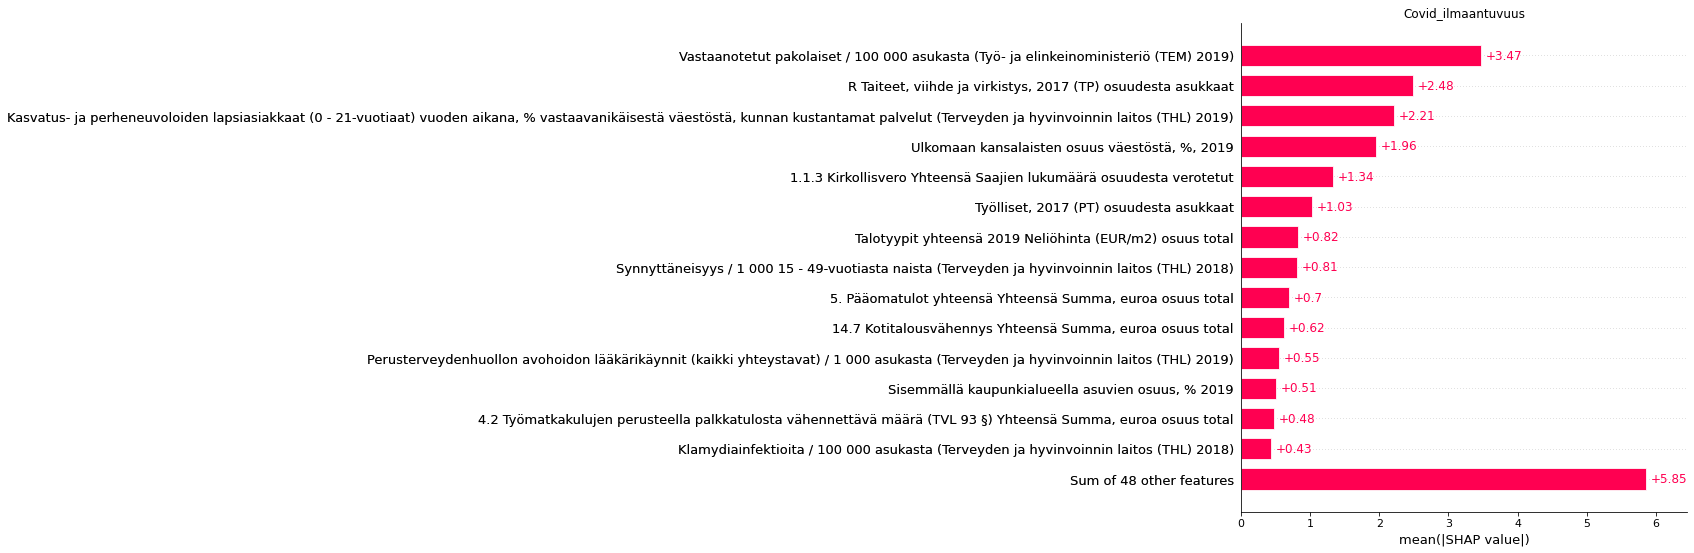

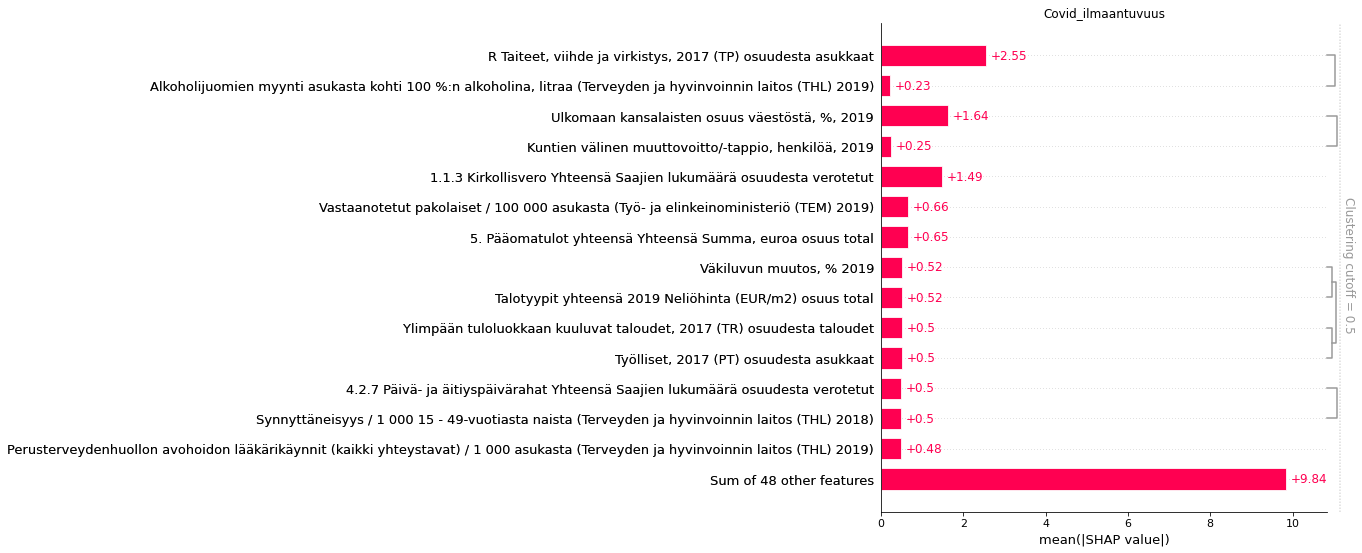

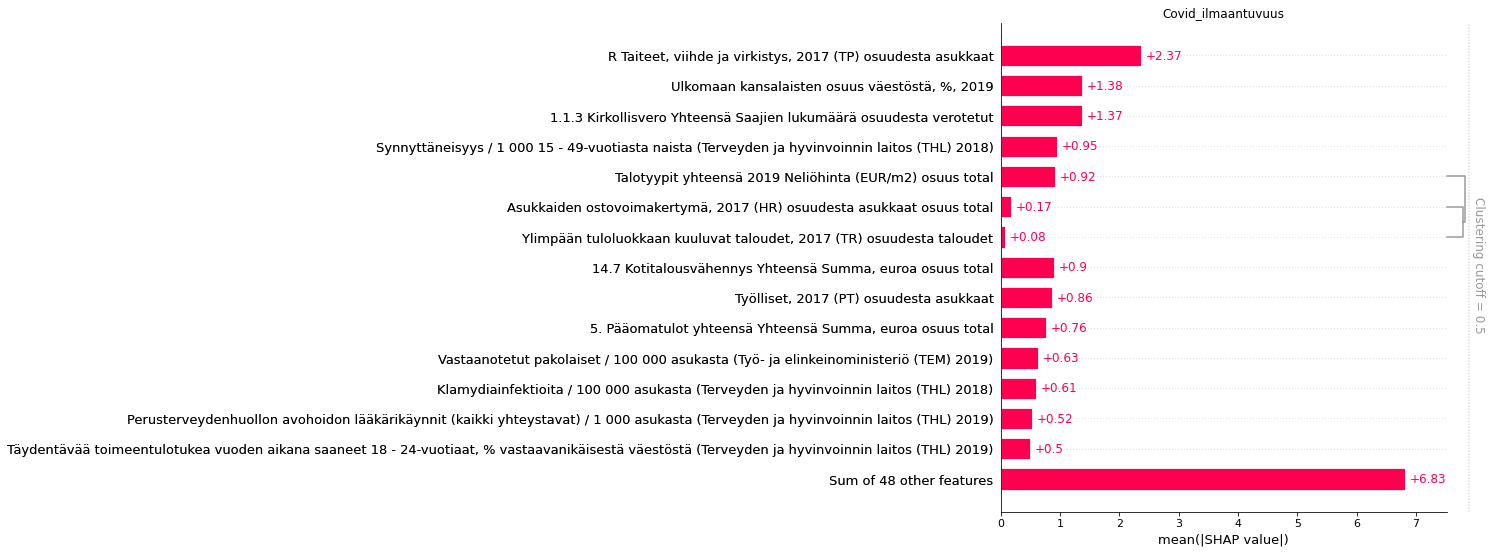

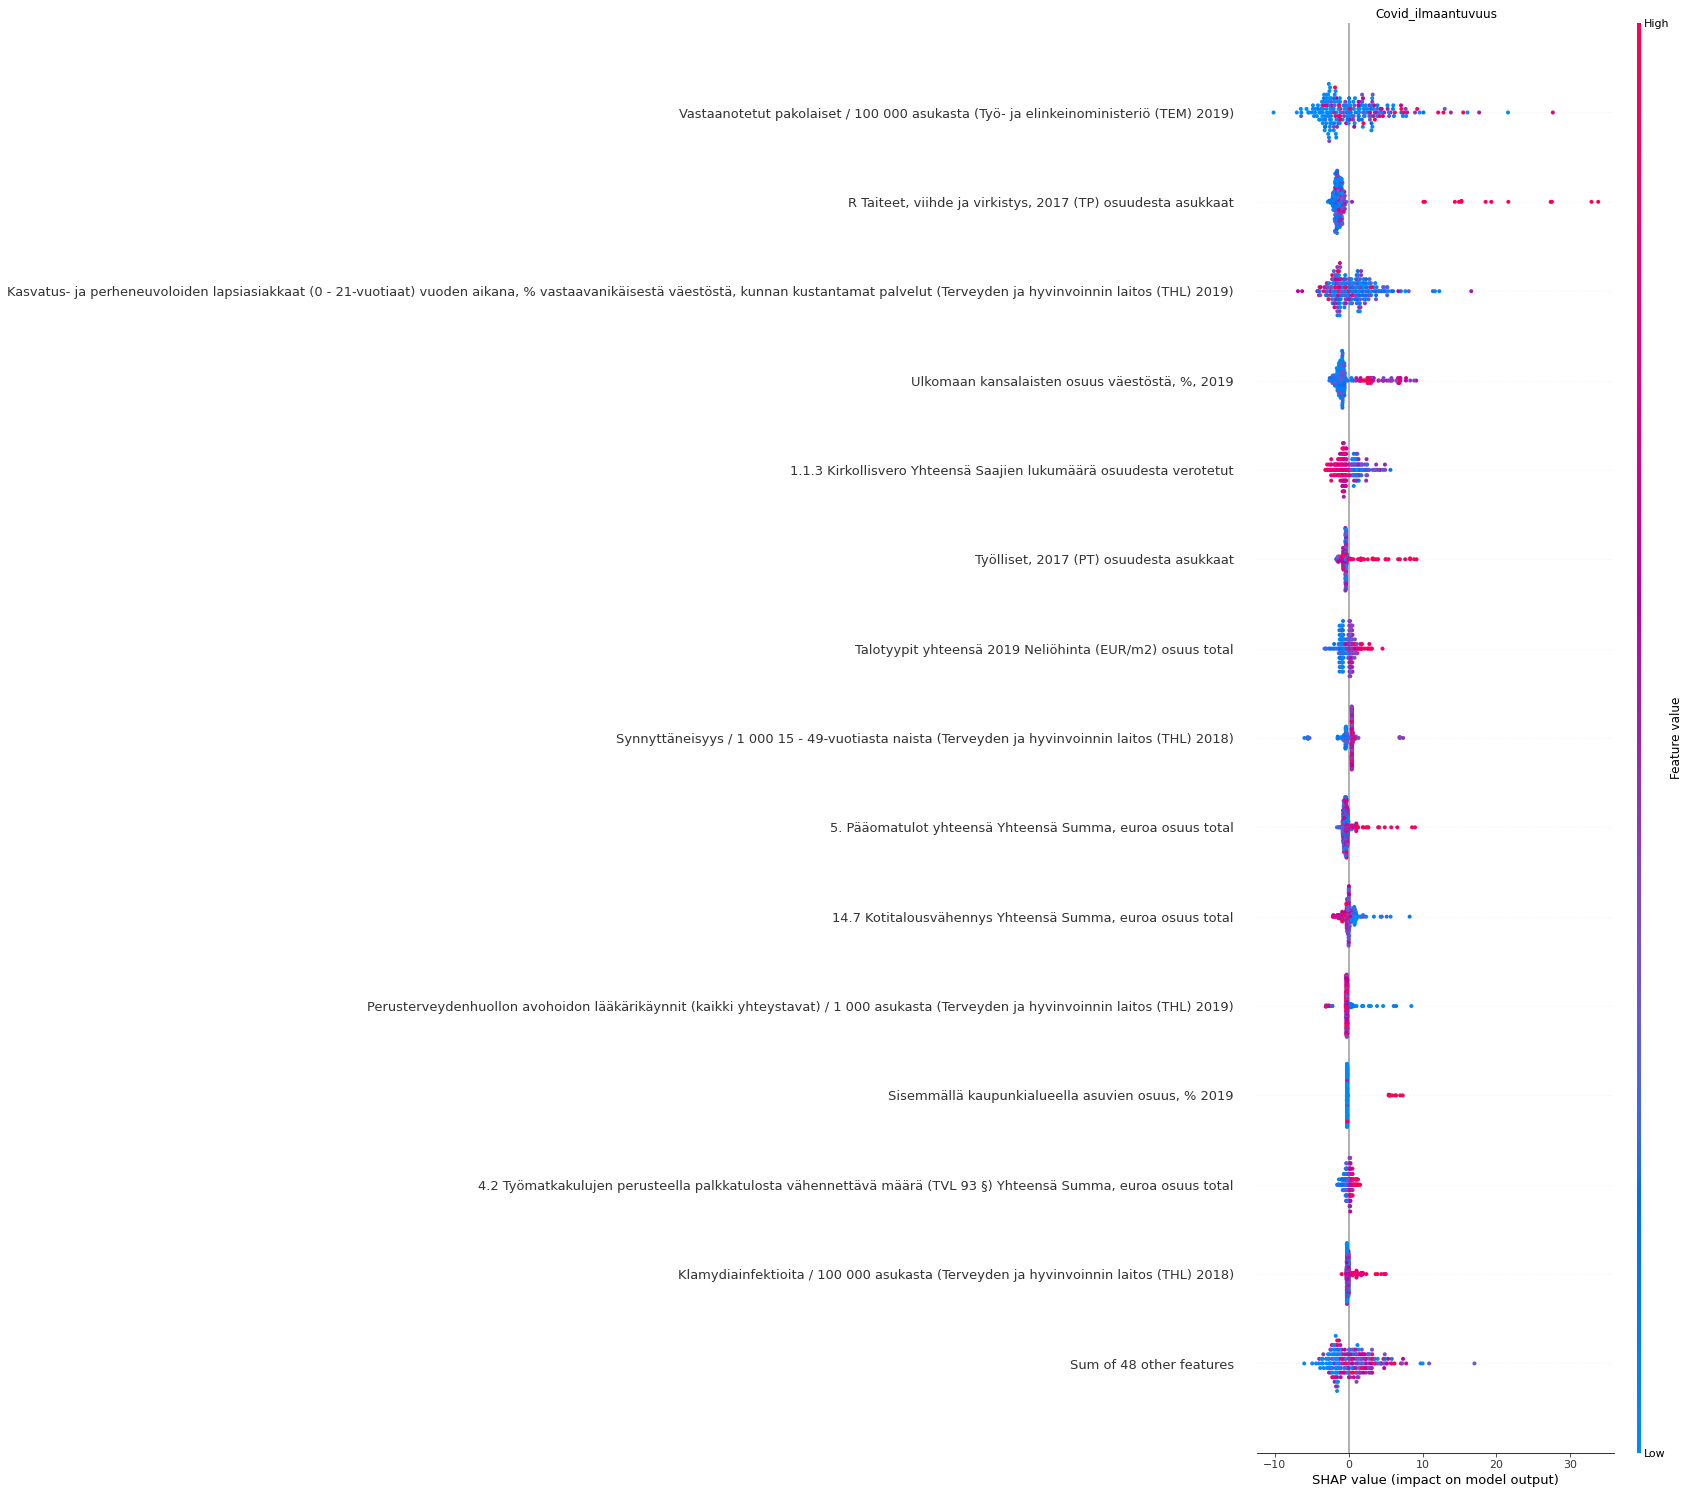

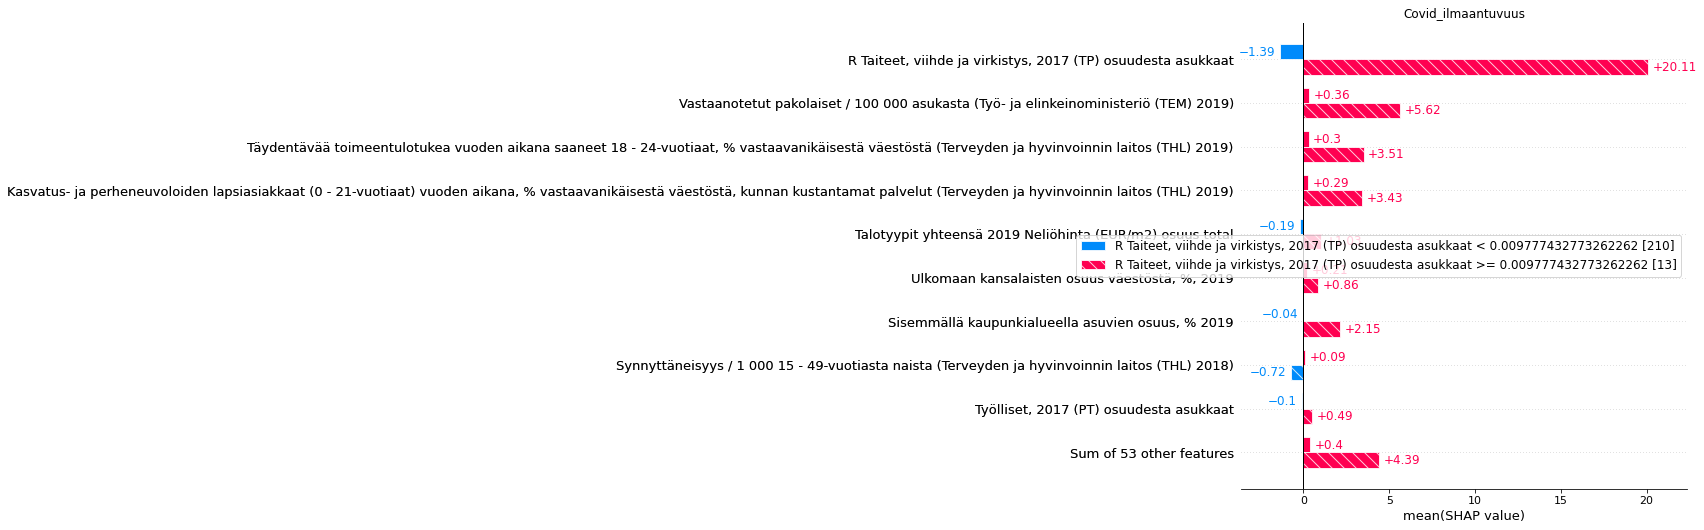

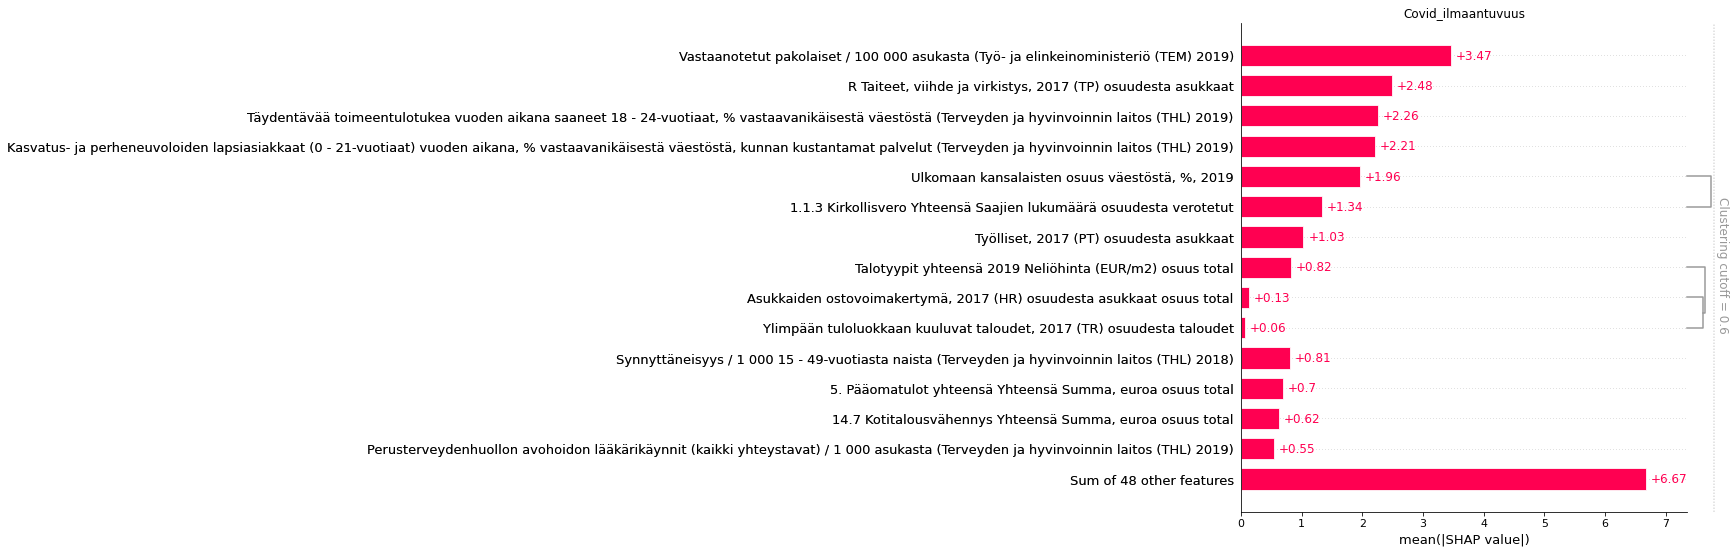

FixedFormatter should only be used together with FixedLocator


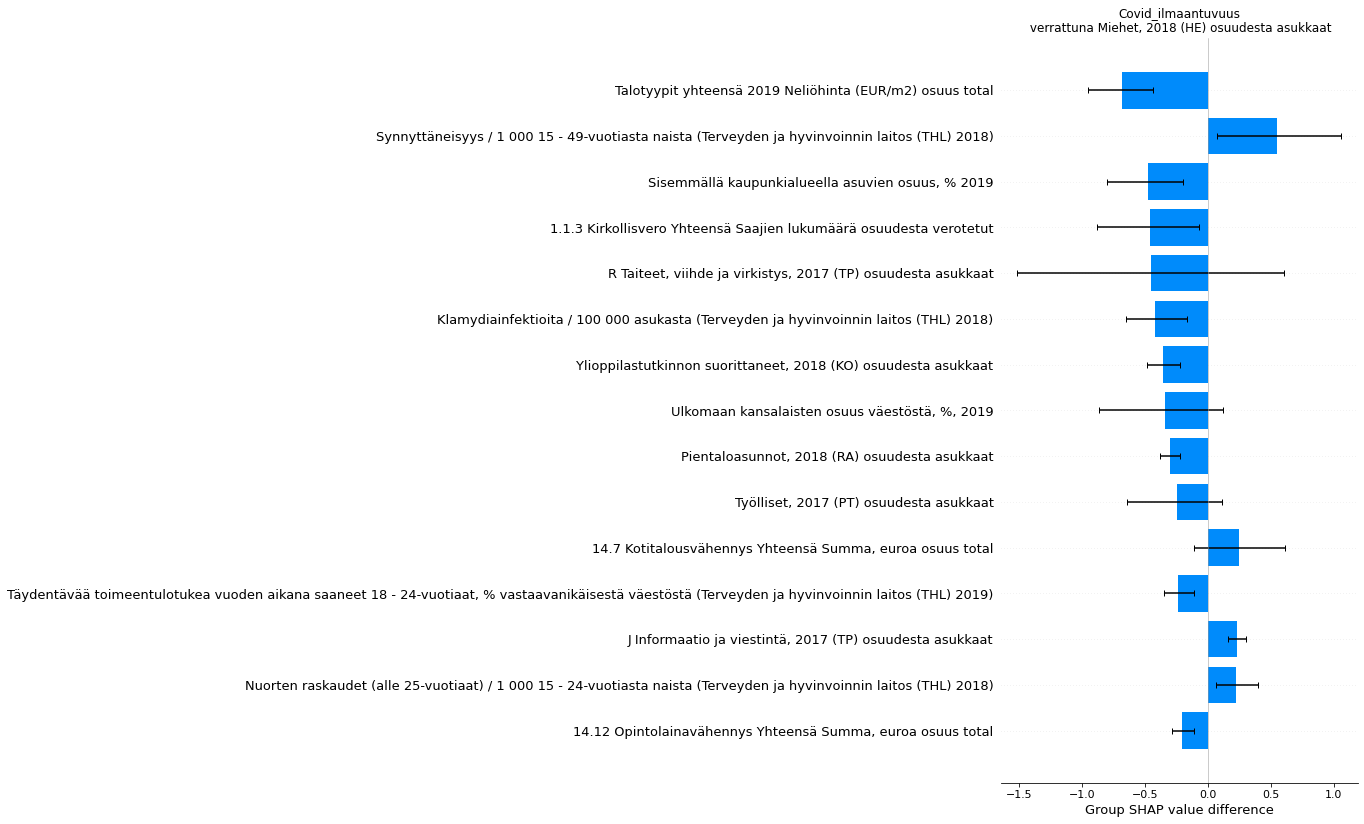

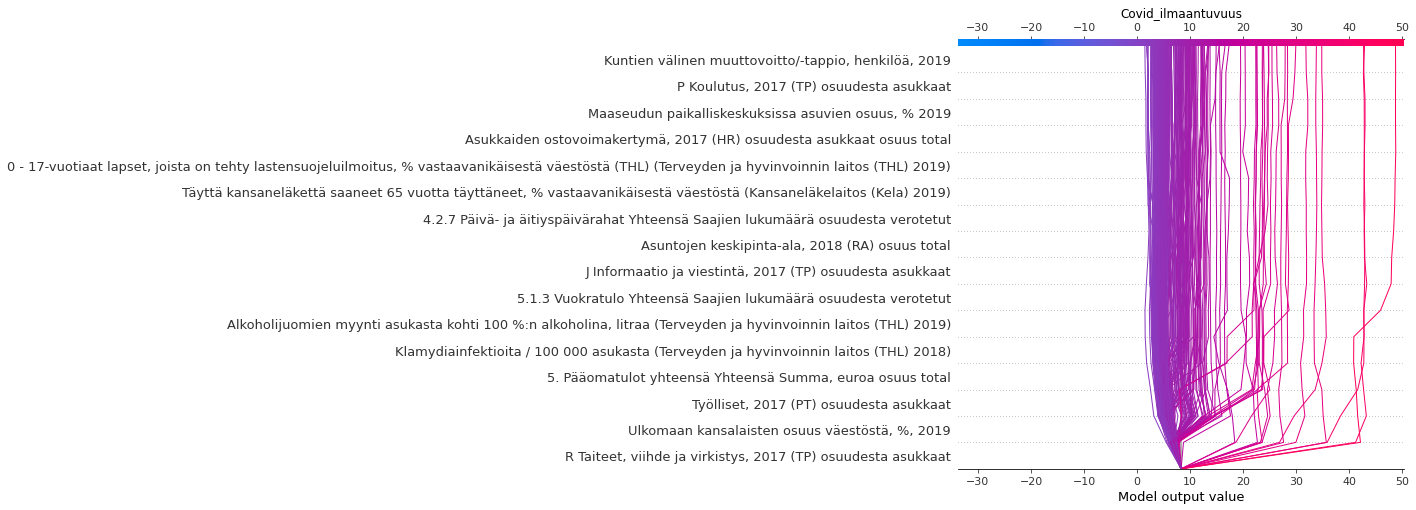

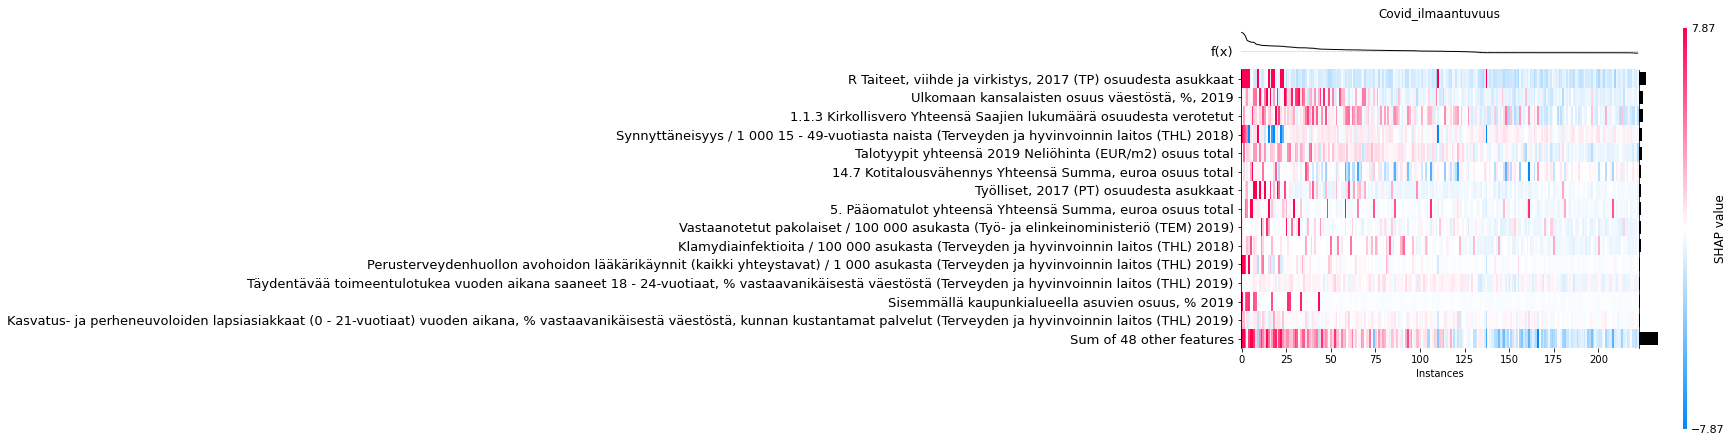

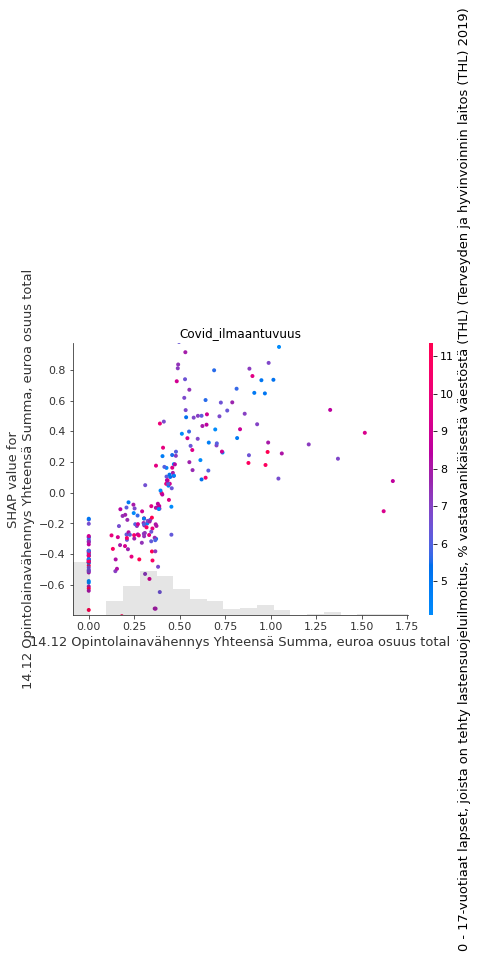

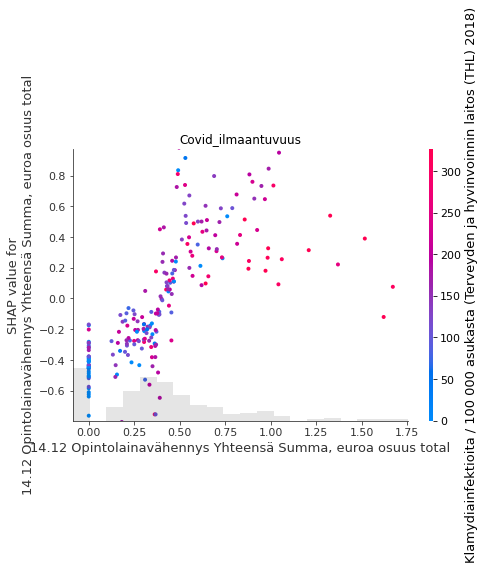

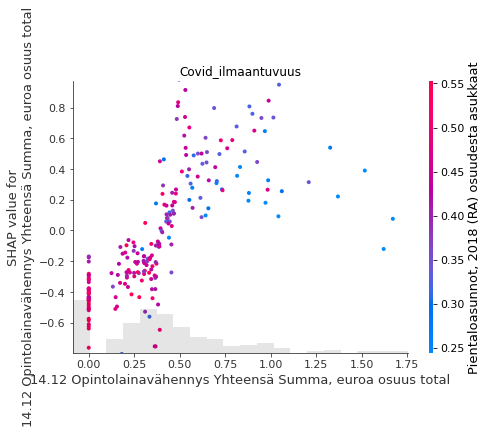

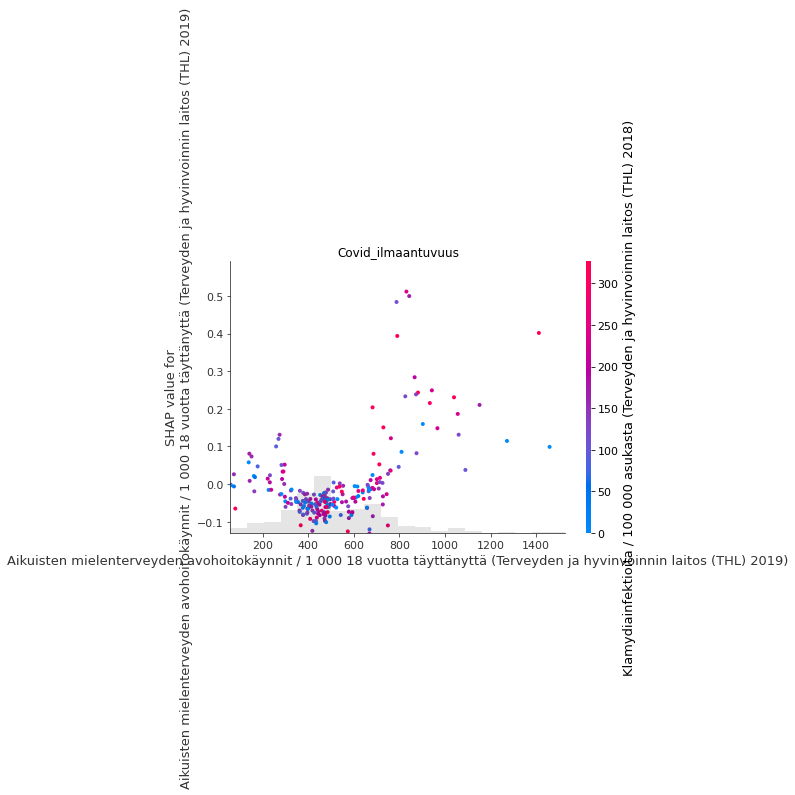

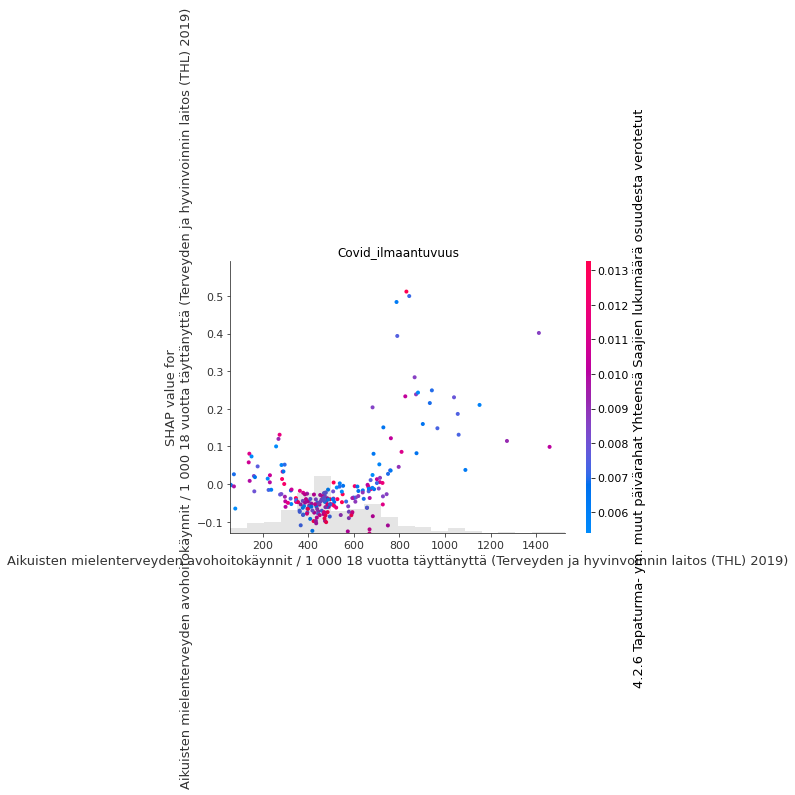

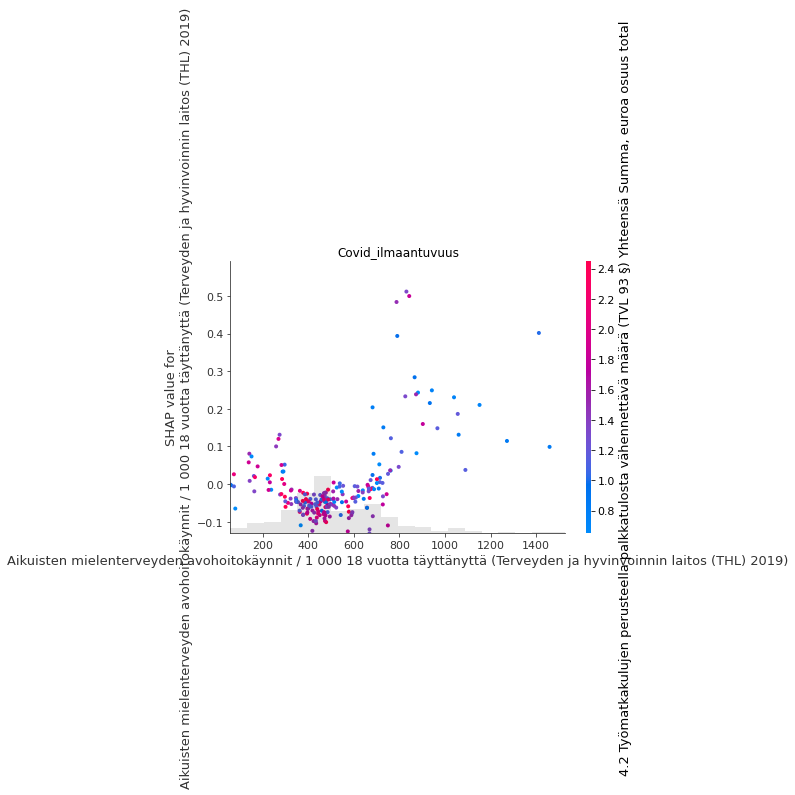

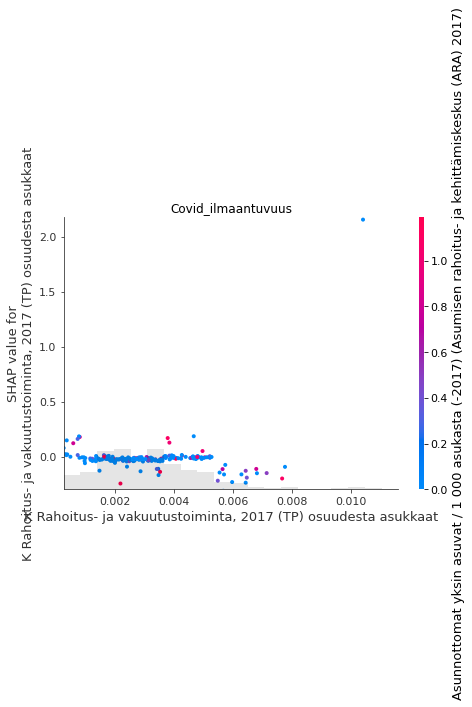

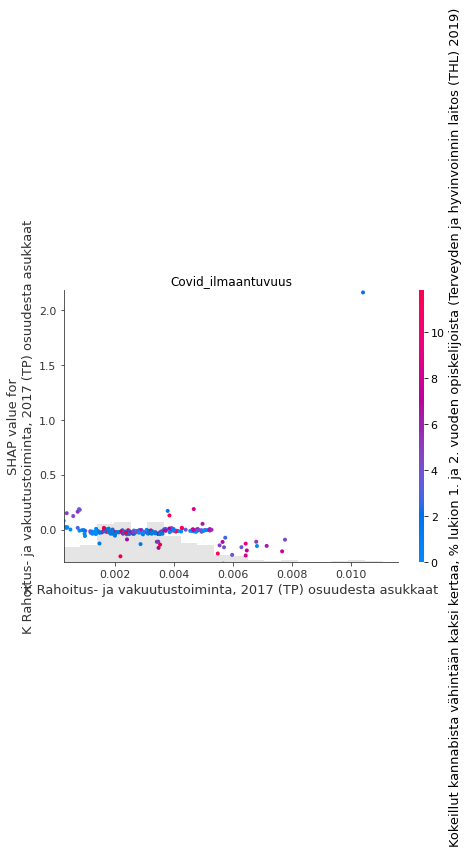

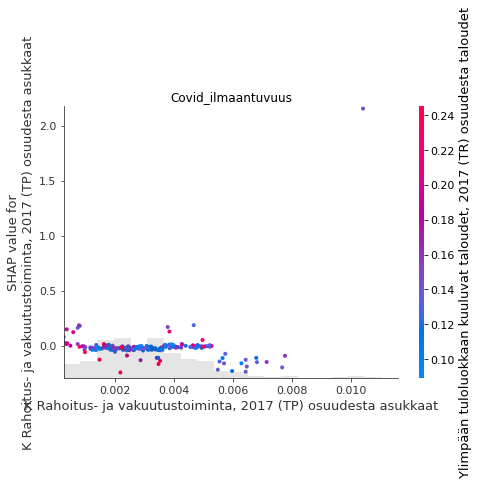

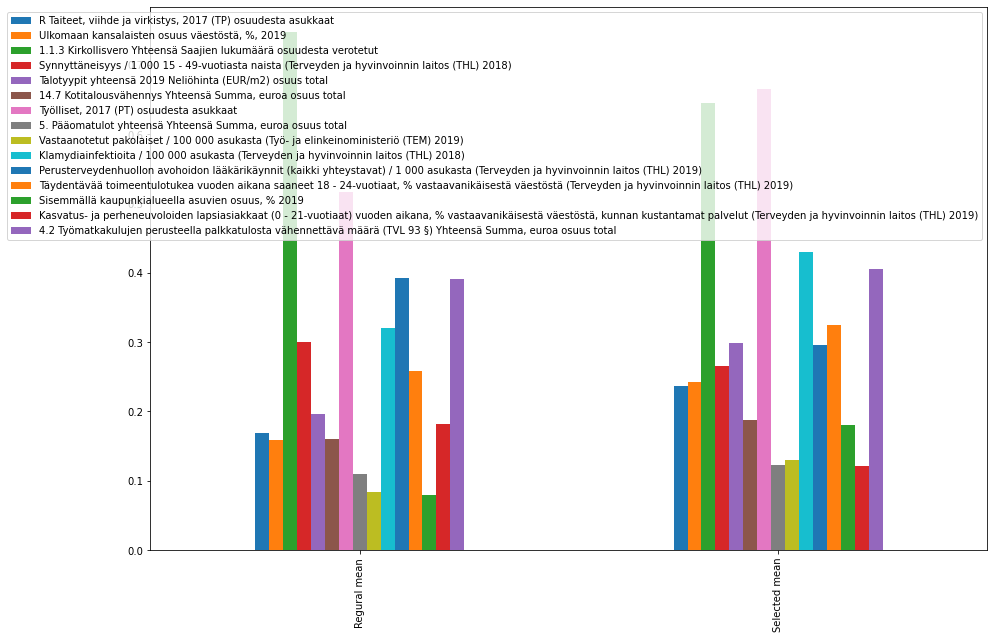

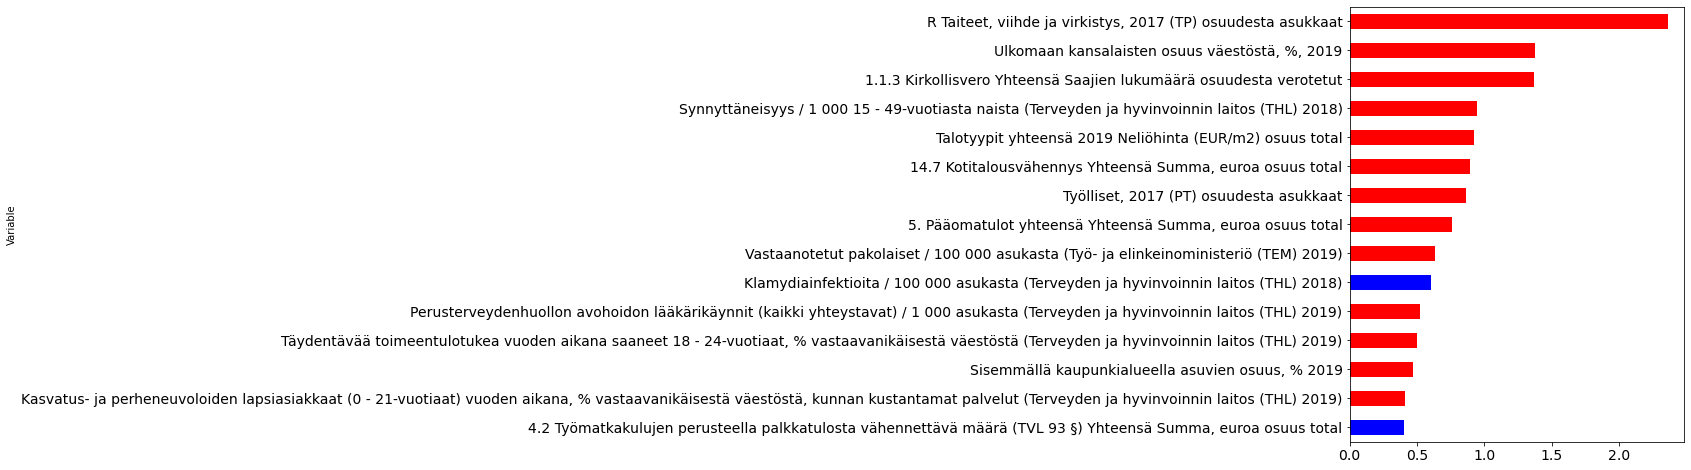

muncipality_code muncipality_name  Asukkaat yhteensä, 2018 (HE)  \
183               753            Sipoo                         20666   
198               853            Turku                        191331   
215               927            Vihti                         29211   
107               434          Loviisa                         14891   
37                165        Janakkala                         16447   

     Covid_ilmaantuvuus  \
183           45.790251   
198           22.987415   
215           17.897708   
107           19.224395   
37            12.645270   

     Kasvatus- ja perheneuvoloiden lapsiasiakkaat (0 - 21-vuotiaat) vuoden aikana, % vastaavanikäisestä väestöstä, kunnan kustantamat palvelut (Terveyden ja hyvinvoinnin laitos (THL) 2019)  \
183                                                1.0                                                                                                                                         
198                                                2.8                                                                                                                                         
215                                                2.8                                                                                                                                         
107                                                0.8                                                                                                                                         
37                                                 2.4                                                                                                                                         

     Vastaanotetut pakolaiset / 100 000 asukasta (Työ- ja elinkeinoministeriö (TEM) 2019)  \
183                                               52.0                                      
198                                               92.2                                      
215                                               89.2                                      
107                                               13.5                                      
37                                                30.5                                      

     Työlliset, 2017 (PT) osuudesta asukkaat  \
183                                 0.474838   
198                                 0.426580   
215                                 0.455548   
107                                 0.405413   
37                                  0.420685   

     14.7 Kotitalousvähennys Yhteensä Summa, euroa osuus total  \
183                                           1.584475           
198                                           0.918991           
215                                           1.183339           
107                                           1.037464           
37                                            1.137056           

     Synnyttäneisyys / 1 000 15 - 49-vuotiasta naista (Terveyden ja hyvinvoinnin laitos (THL) 2018)  \
183                                               28.8                                                
198                                               36.1                                                
215                                               35.6                                                
107                                               39.9                                                
37                                                41.5                                                

     Perusterveydenhuollon avohoidon lääkärikäynnit (kaikki yhteystavat) / 1 000 asukasta (Terveyden ja hyvinvoinnin laitos (THL) 2019)  \
183                                             1088.0                                                                                    
198                                             1505.0                                                            

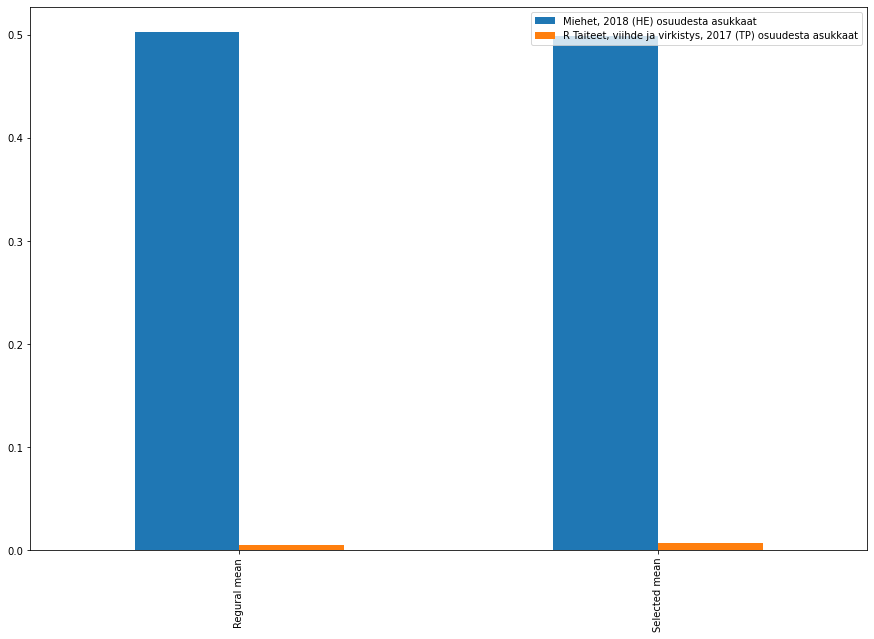

In [37]:
columns = 15
scaled = True
included_columns = []
samples = 5
show_cols = ['muncipality_code', 'muncipality_name','Asukkaat yhteensä, 2018 (HE)']
all_included_columns = ['Miehet, 2018 (HE) osuudesta asukkaat','R Taiteet, viihde ja virkistys, 2017 (TP) osuudesta asukkaat']
compare = {}
stats_data = {}
k = {}
k_compare = {}
comp_col = 'Miehet, 2018 (HE) osuudesta asukkaat'
t = target[0]

compare_to =  data[data[t]>data[data[t]>0][t].median()].copy()

stats_data[t], k[t], col_list = show_all_results(compare_to, data, X, y[t], shap_data[t], t, columns, all_included_columns, show_cols, comp_col, scaled=scaled, included_columns=included_columns, samples=samples)

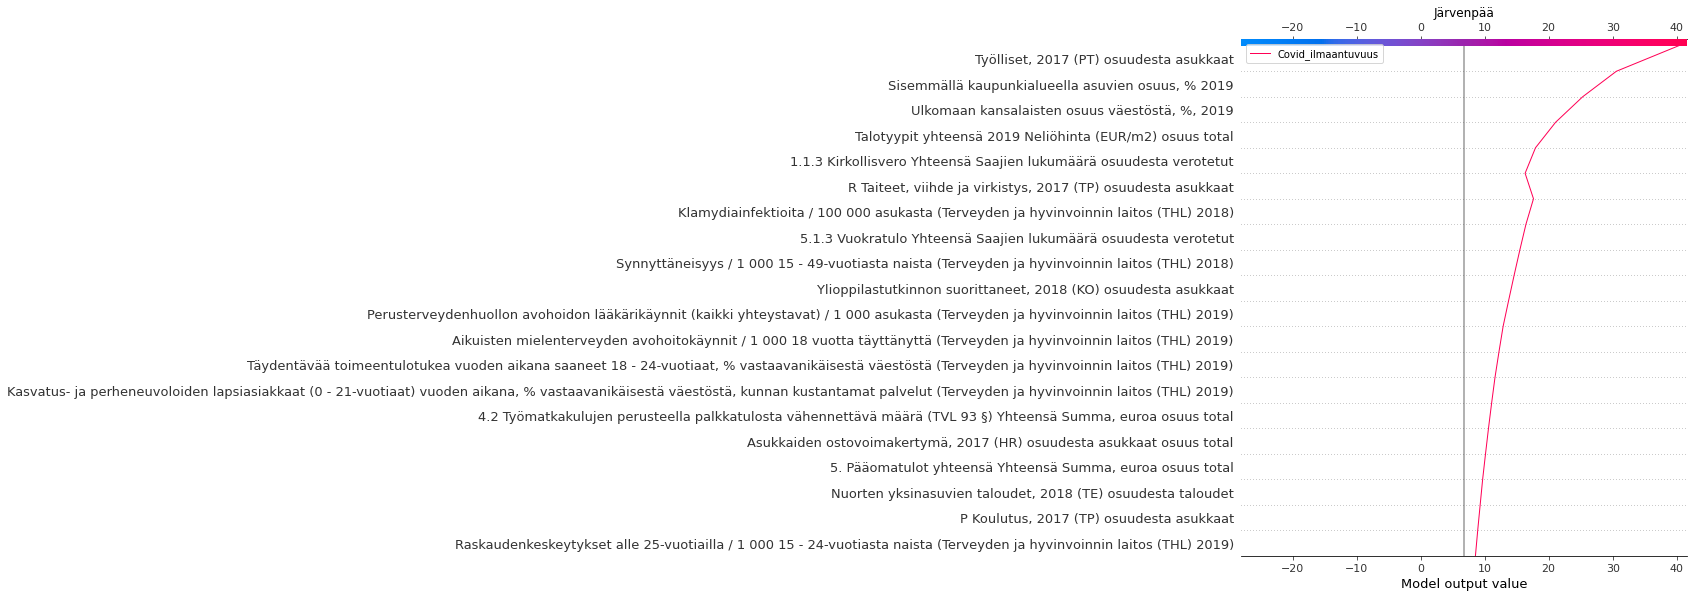

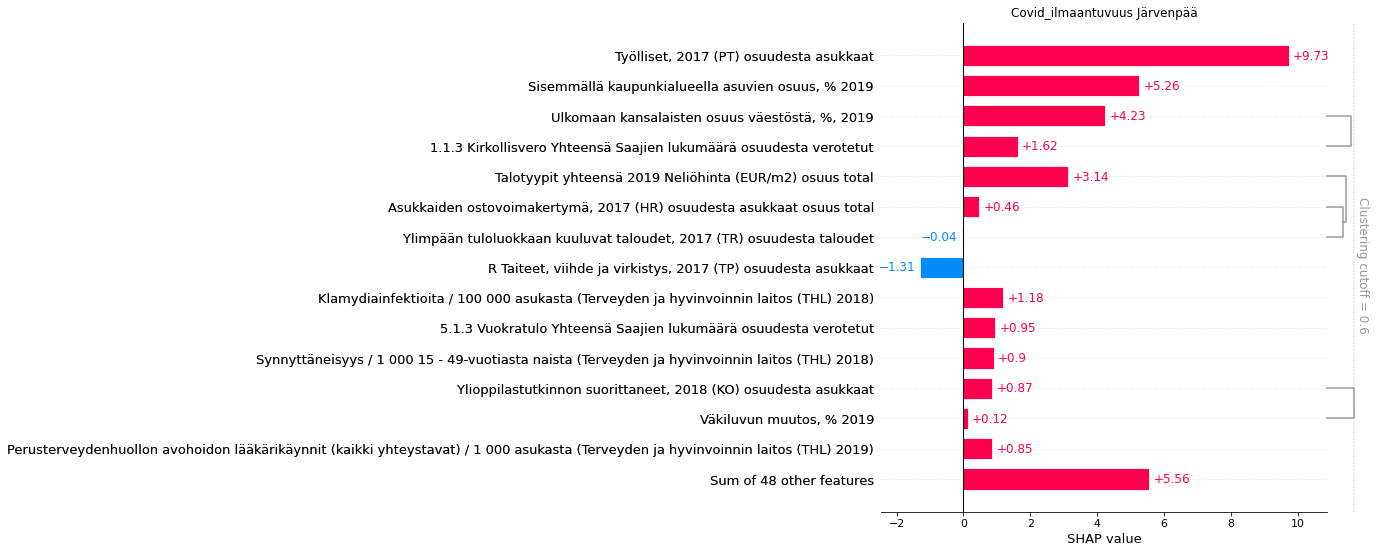

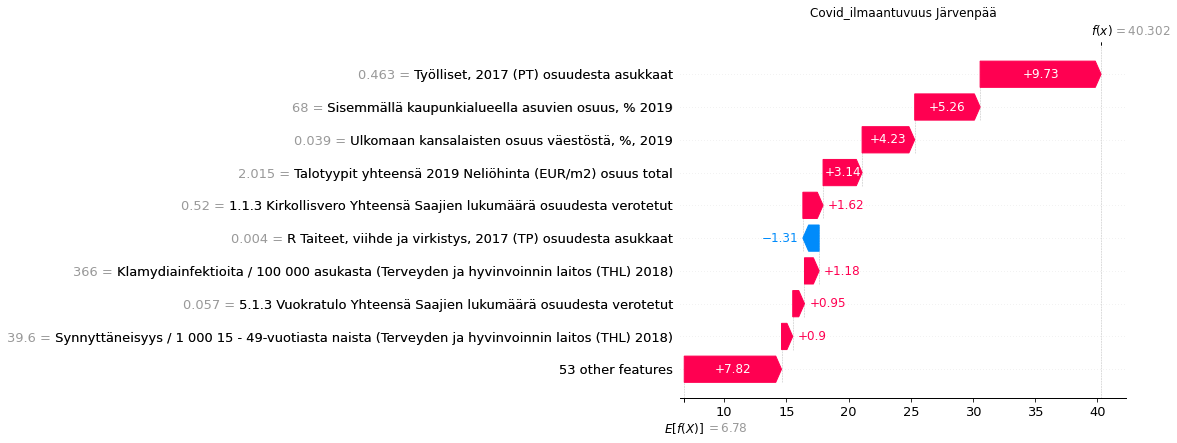

In [45]:
key_value = 'Järvenpää'
key = 'muncipality_name'
show_one_results(data, X, y, model_list, shap_data, target, key, key_value, columns)

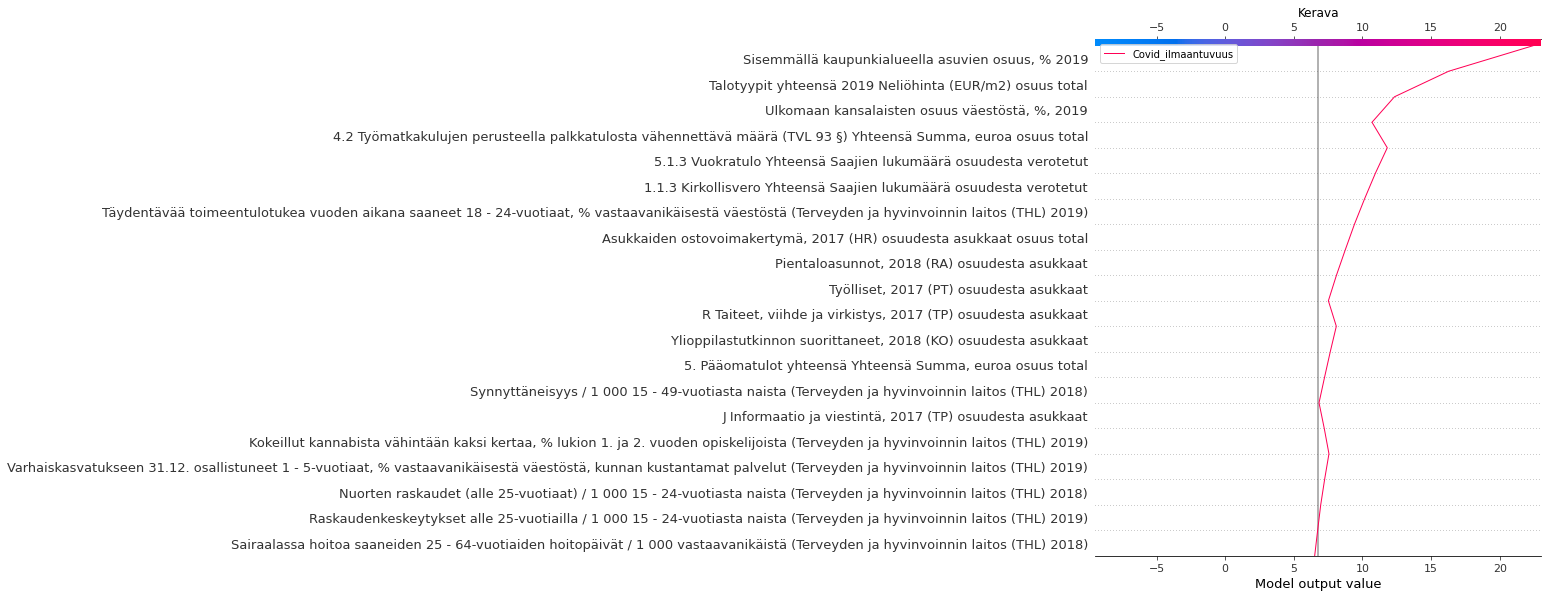

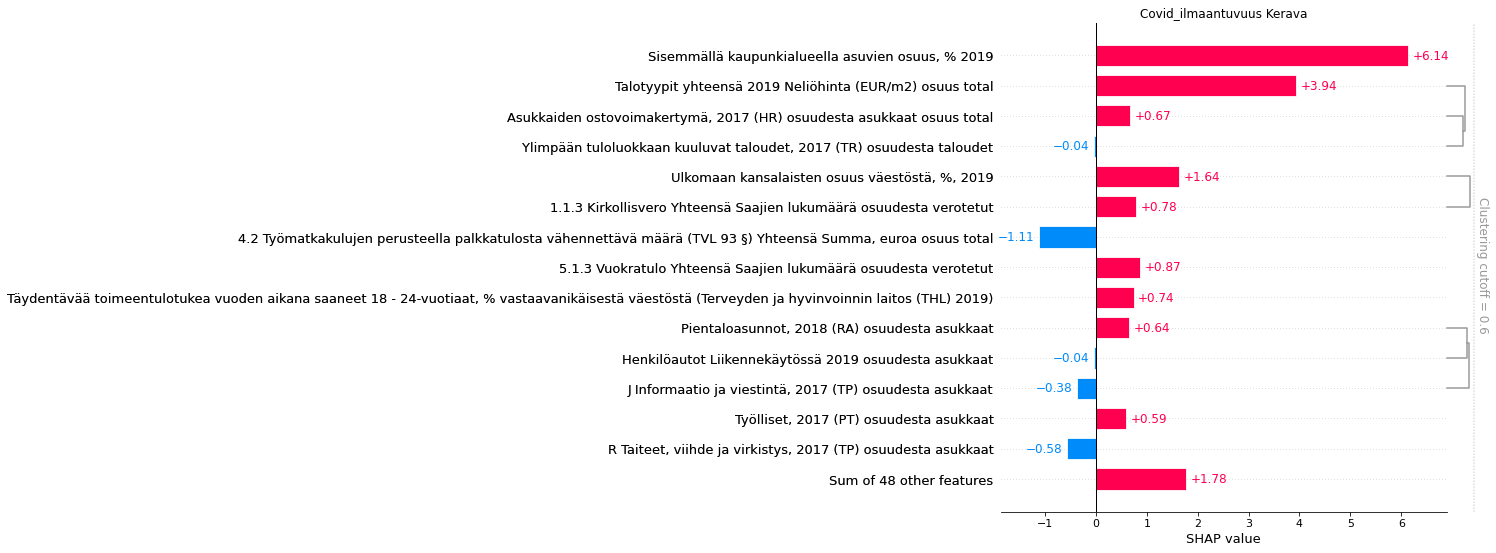

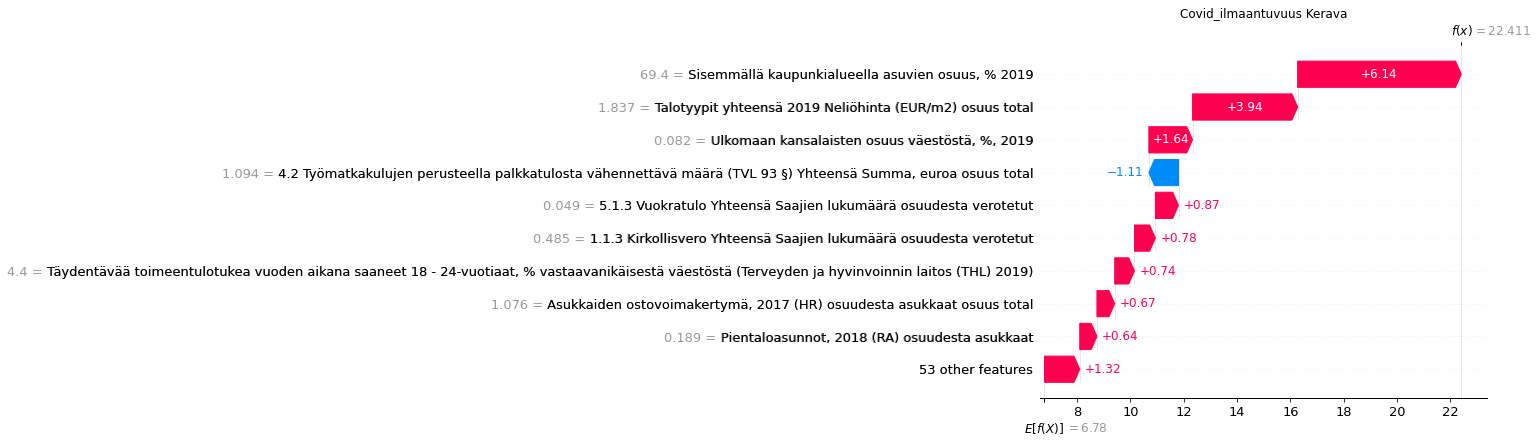

In [46]:
key_value = 'Kerava'
key = 'muncipality_name'
show_one_results(data, X, y, model_list, shap_data, target, key, key_value, columns)

In [8]:
y['Covid_ilmaantuvuus'].head(20)

0      0.000000
1      0.000000
2      9.391275
3      8.486906
4     17.539464
5     48.164447
6      0.000000
7     12.603718
8      5.819028
9      0.000000
10     0.000000
11     8.295516
12     0.000000
13     8.218856
14     0.000000
15     0.000000
16    11.446410
17    15.286924
18     4.705144
19    64.887015
Name: Covid_ilmaantuvuus, dtype: float64

In [9]:
y_test_pred['Covid_ilmaantuvuus'].head(20)

0      0.155440
1      0.010630
2      9.312031
3      8.434227
4     17.483028
5     48.249317
6      0.122751
7     12.631111
8      5.761039
9     -0.348616
10    -0.082605
11     8.250799
12     0.034491
13     8.280128
14    -0.013862
15     0.074359
16     9.113732
17    15.306349
18     4.868431
19    65.257256
Name: Covid_ilmaantuvuus, dtype: float32

In [20]:
features_dict['Covid_ilmaantuvuus'].sort_values('Shap_permutation_importance', ascending=False)['Feature'].tolist()

['R Taiteet, viihde ja virkistys, 2017 (TP) osuudesta asukkaat',
 'Ulkomaan kansalaisten osuus väestöstä, %, 2019',
 '1.1.3 Kirkollisvero Yhteensä Saajien lukumäärä osuudesta verotetut',
 'Synnyttäneisyys / 1 000 15 - 49-vuotiasta naista (Terveyden ja hyvinvoinnin laitos (THL) 2018)',
 'Talotyypit yhteensä 2019 Neliöhinta (EUR/m2) osuus total',
 '14.7 Kotitalousvähennys Yhteensä Summa, euroa osuus total',
 'Työlliset, 2017 (PT) osuudesta asukkaat',
 '5. Pääomatulot yhteensä Yhteensä Summa, euroa osuus total',
 'Vastaanotetut pakolaiset / 100 000 asukasta (Työ- ja elinkeinoministeriö (TEM) 2019)',
 'Klamydiainfektioita / 100 000 asukasta (Terveyden ja hyvinvoinnin laitos (THL) 2018)',
 'Perusterveydenhuollon avohoidon lääkärikäynnit (kaikki yhteystavat) / 1 000 asukasta (Terveyden ja hyvinvoinnin laitos (THL) 2019)',
 'Täydentävää toimeentulotukea vuoden aikana saaneet 18 - 24-vuotiaat, % vastaavanikäisestä väestöstä (Terveyden ja hyvinvoinnin laitos (THL) 2019)',
 'Sisemmällä kaupunkia

In [ ]:
import shap
shap.plots.scatter(shap_values[:,"Age"])
shap.plots.scatter(feature, color=shap_values[:,inds[i]], ymin=feature.percentile(low), ymax=feature.percentile(high), xmin=feature.percentile(low), xmax=feature.percentile(high), show=False)
plt.title(t)
# plt.savefig("my_dependence_plot.pdf") # we can save a PDF of the figure if we want
plt.show()

In [15]:
selected_columns_dict[t]['Feature'].tolist()

['Pientaloasunnot, 2018 (RA) osuudesta asukkaat',
 'Raskaudenkeskeytykset alle 25-vuotiailla / 1 000 15 - 24-vuotiasta naista (Terveyden ja hyvinvoinnin laitos (THL) 2019)',
 '5. Pääomatulot yhteensä Yhteensä Summa, euroa osuus total',
 'Ulkomaan kansalaisten osuus väestöstä, %, 2019',
 'Täydentävää toimeentulotukea vuoden aikana saaneet 18 - 24-vuotiaat, % vastaavanikäisestä väestöstä (Terveyden ja hyvinvoinnin laitos (THL) 2019)',
 'Talotyypit yhteensä 2019 Neliöhinta (EUR/m2) osuus total',
 '4.2.6 Tapaturma- ym. muut päivärahat Yhteensä Saajien lukumäärä osuudesta verotetut',
 'Kesämökit yhteensä, 2018 (RA) osuudesta asukkaat',
 'R Taiteet, viihde ja virkistys, 2017 (TP) osuudesta asukkaat',
 'Harvaan asutulla maaseudulla asuvien osuus, % 2019',
 'Nuorten raskaudet (alle 25-vuotiaat) / 1 000 15 - 24-vuotiasta naista (Terveyden ja hyvinvoinnin laitos (THL) 2018)',
 'Tupakoi päivittäin, % 8. ja 9. luokan oppilaista (Terveyden ja hyvinvoinnin laitos (THL) 2019)',
 'Alkoholijuomien myyn

In [11]:
shap_values = shap_data[t]['shap_values']
expected_value = shap_data[t]['expected_value']
shap_interaction_values = shap_data[t]['shap_interaction_values']
shap_values_Partition = shap_data[t]['shap_values_Partition']
shap_values_Permutation = shap_data[t]['shap_values_Permutation']
clustering = shap_data[t]['clustering']

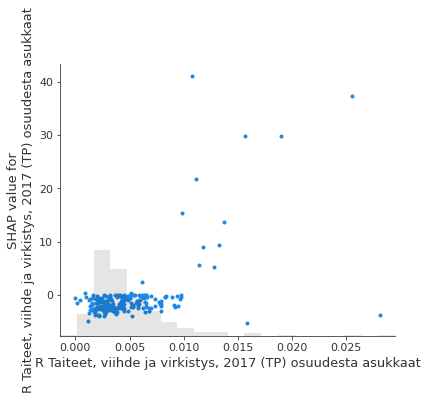

In [23]:
import shap
shap.plots.scatter(shap_values_Partition[:,'R Taiteet, viihde ja virkistys, 2017 (TP) osuudesta asukkaat'])

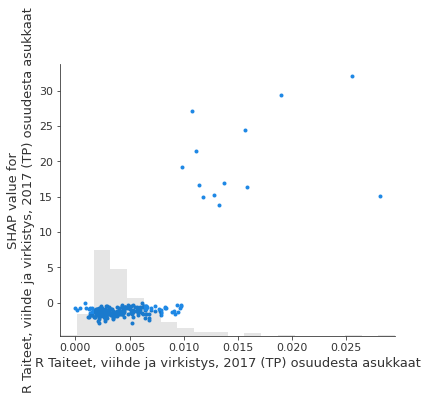

In [17]:

shap.plots.scatter(shap_values_Permutation[:,'R Taiteet, viihde ja virkistys, 2017 (TP) osuudesta asukkaat'])

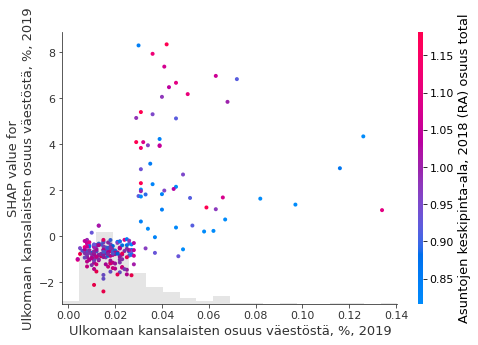

In [24]:

shap.plots.scatter(shap_values_Permutation[:,'Ulkomaan kansalaisten osuus väestöstä, %, 2019'], color=shap_values_Permutation)

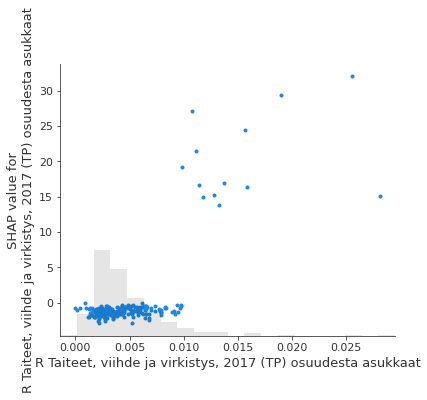

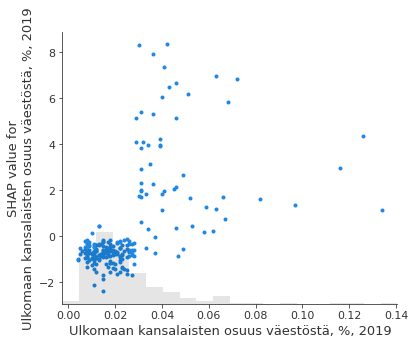

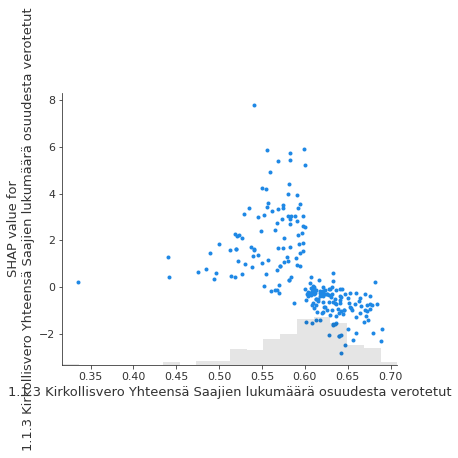

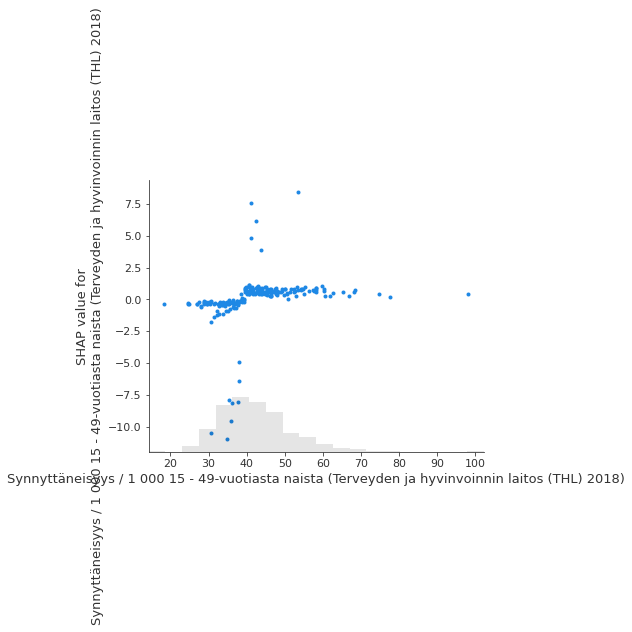

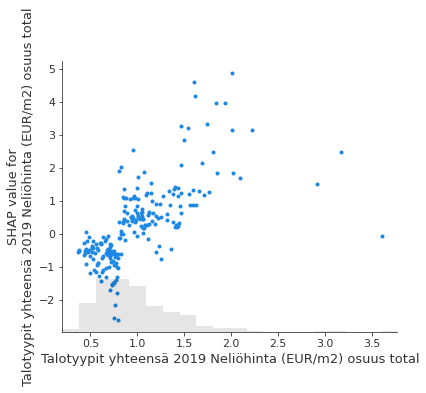

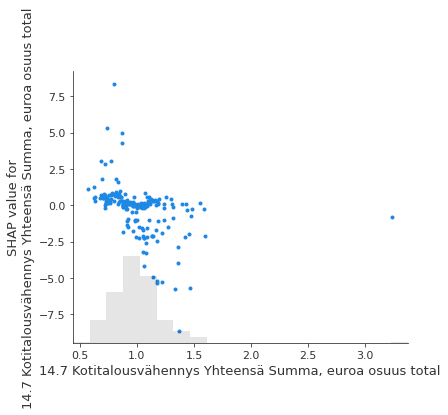

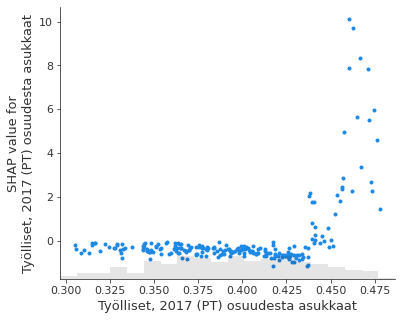

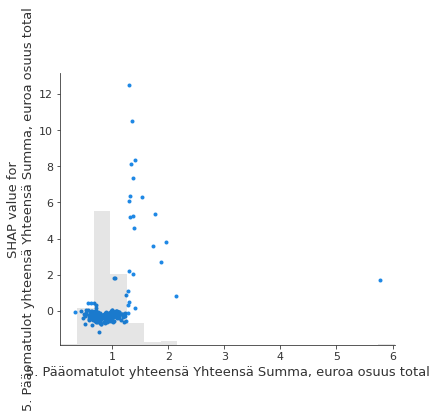

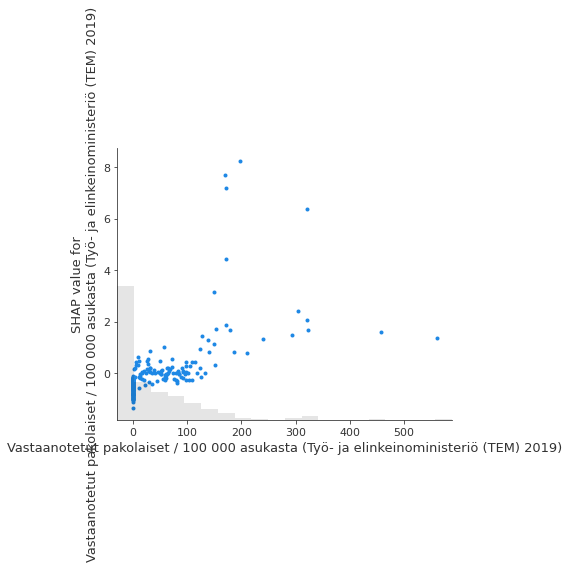

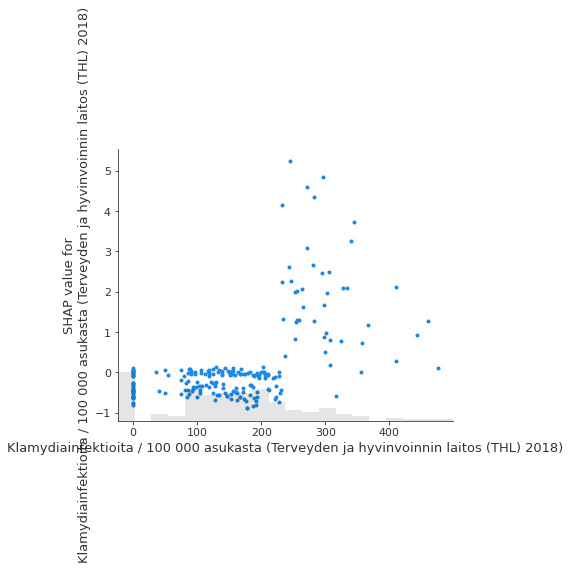

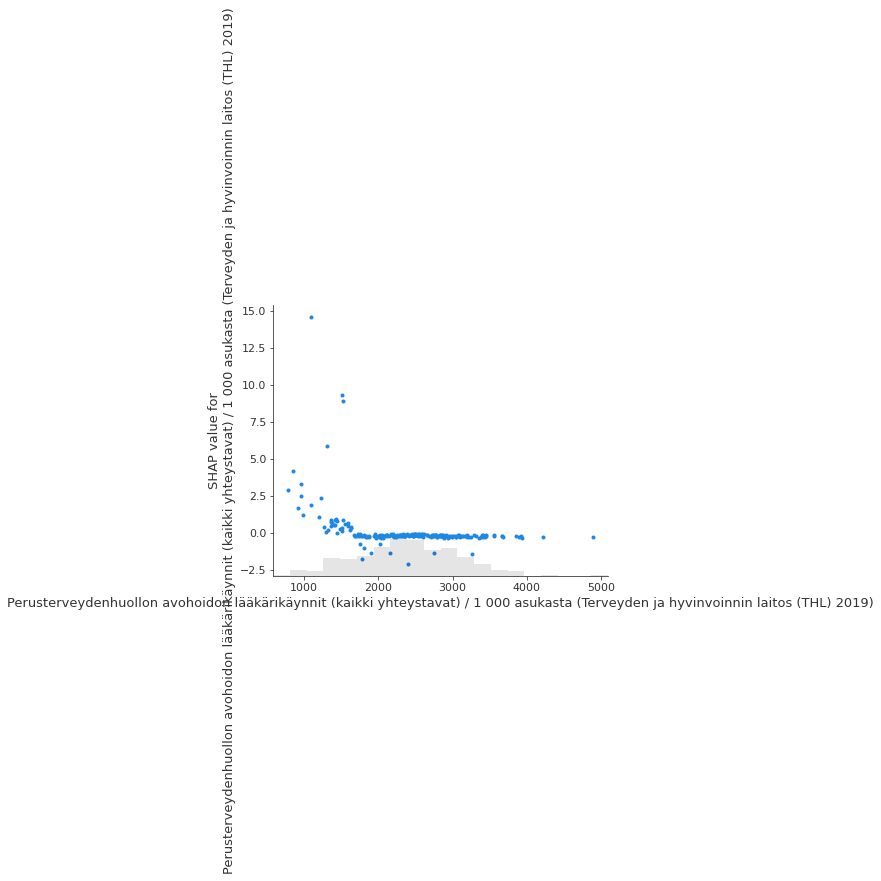

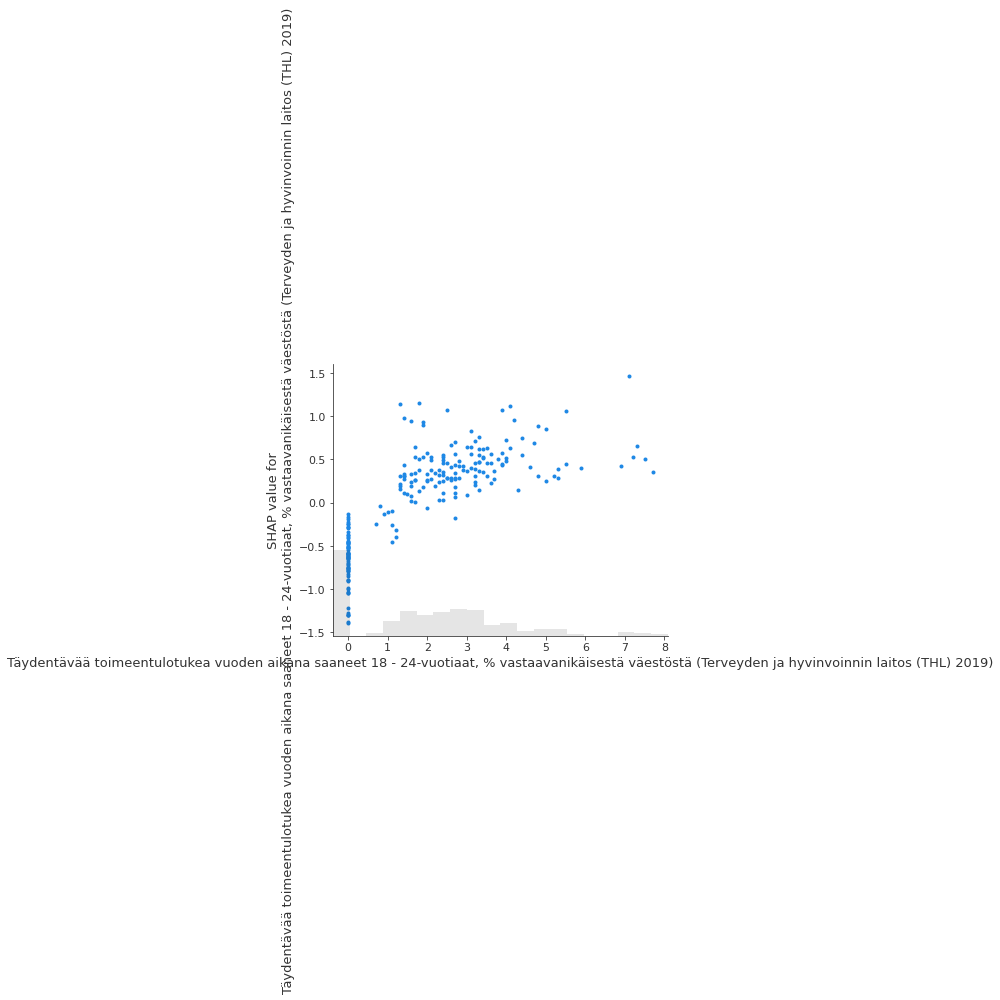

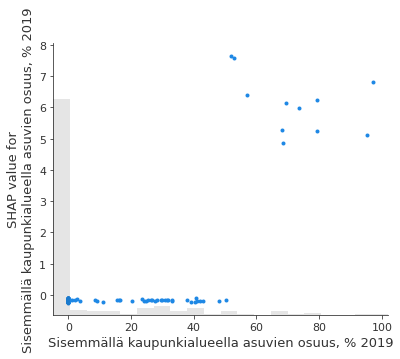

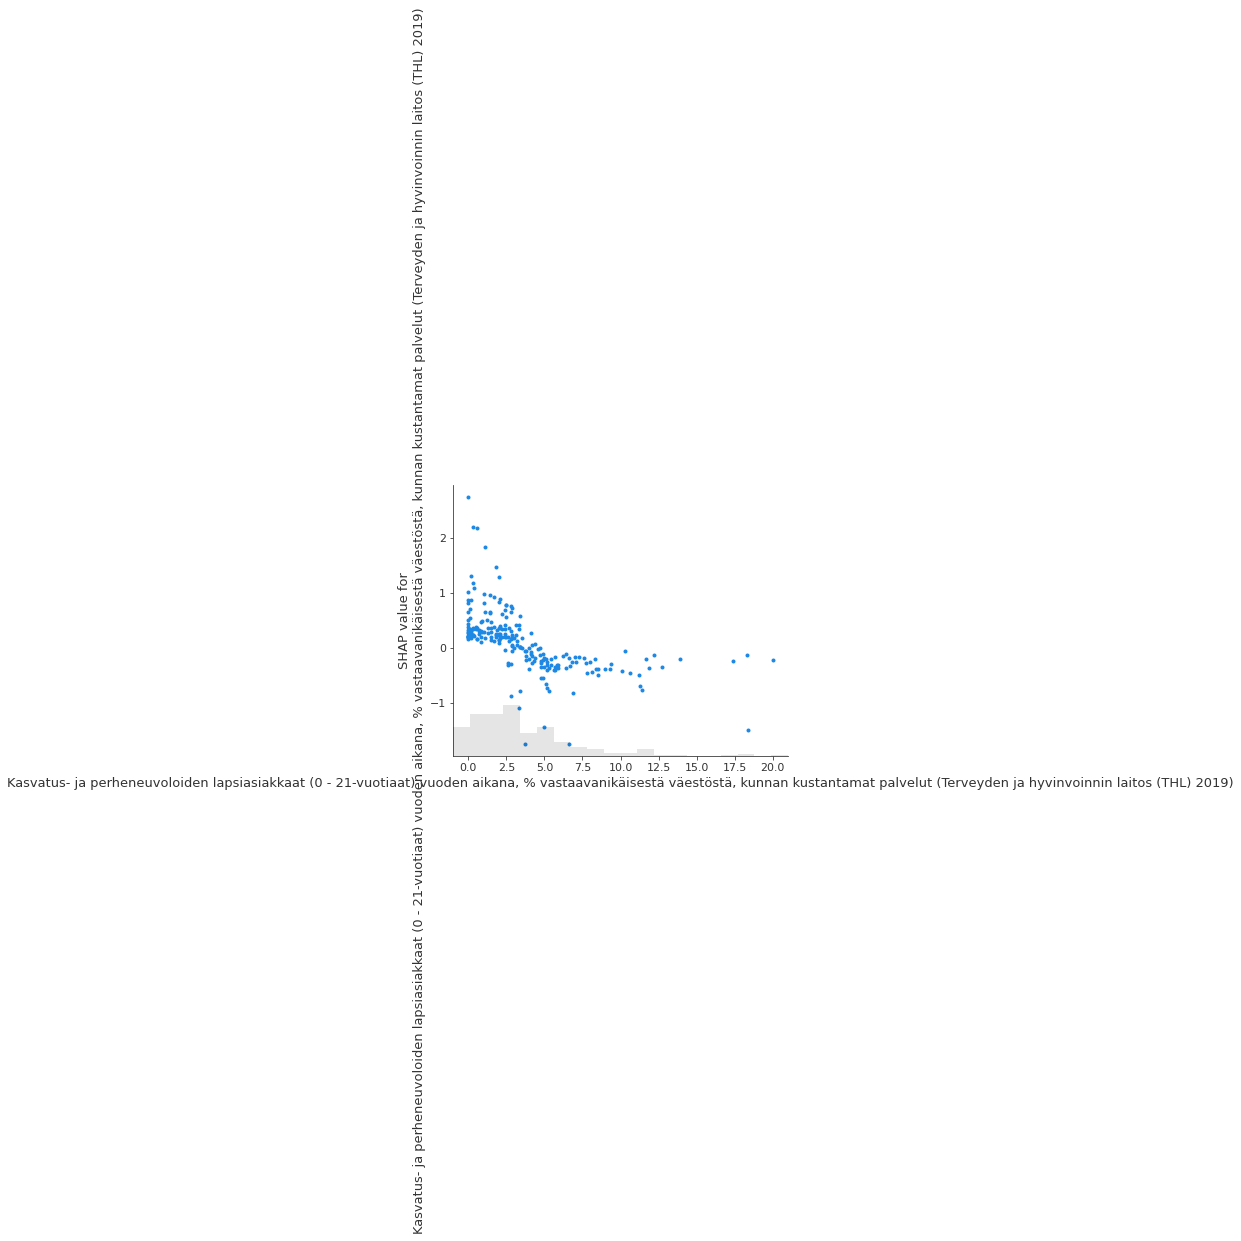

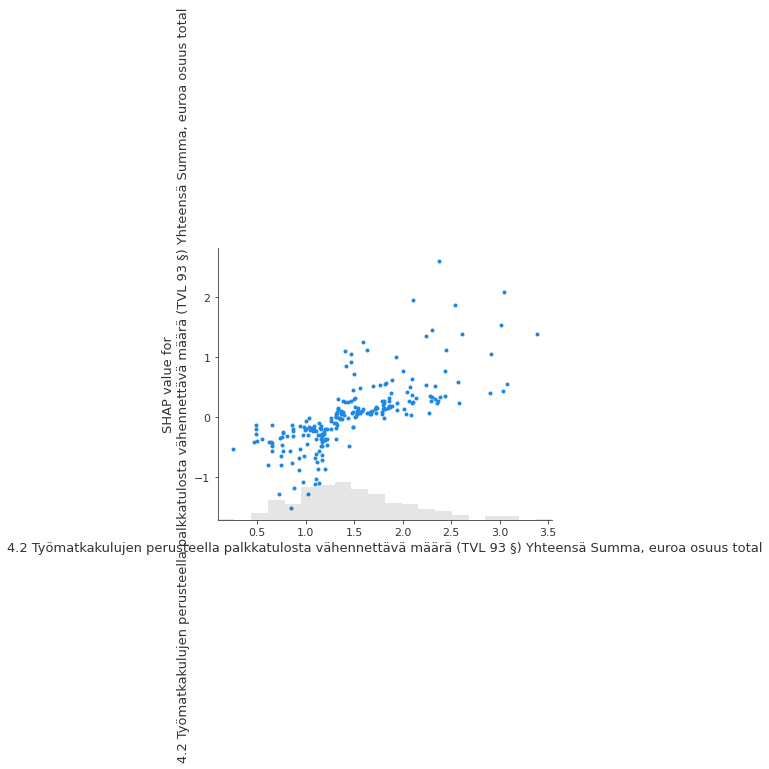

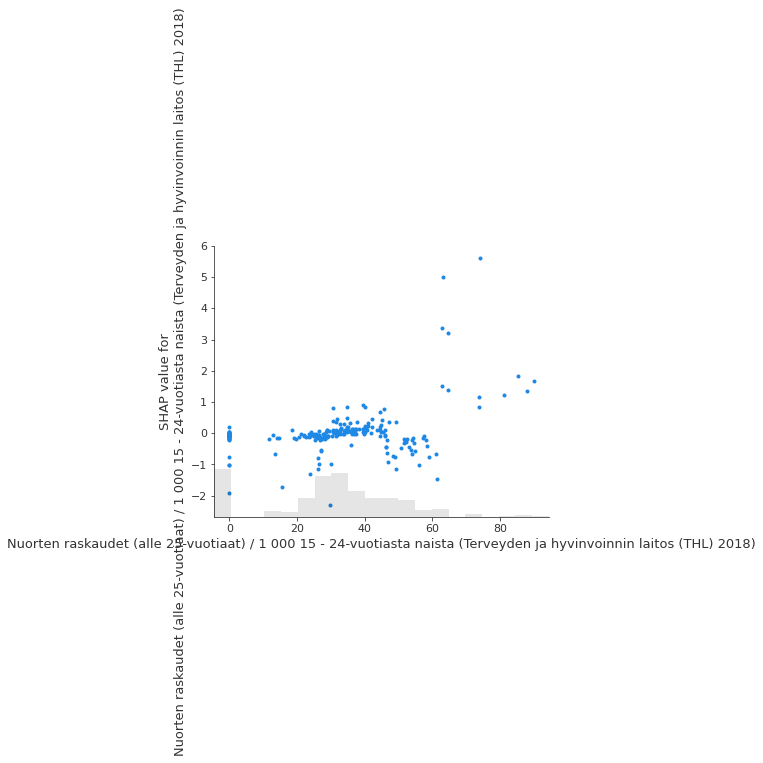

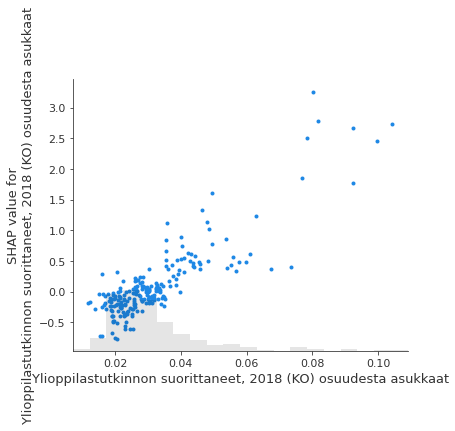

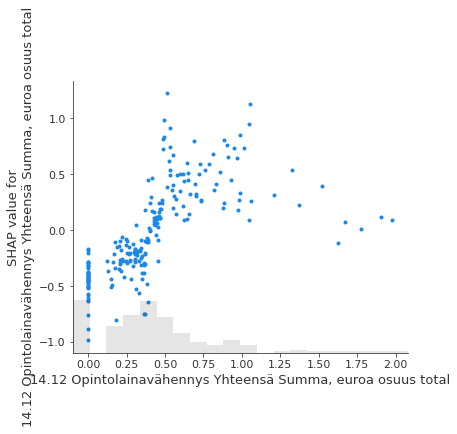

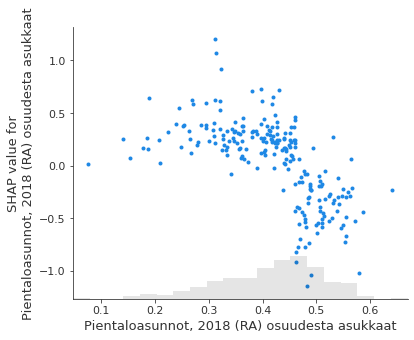

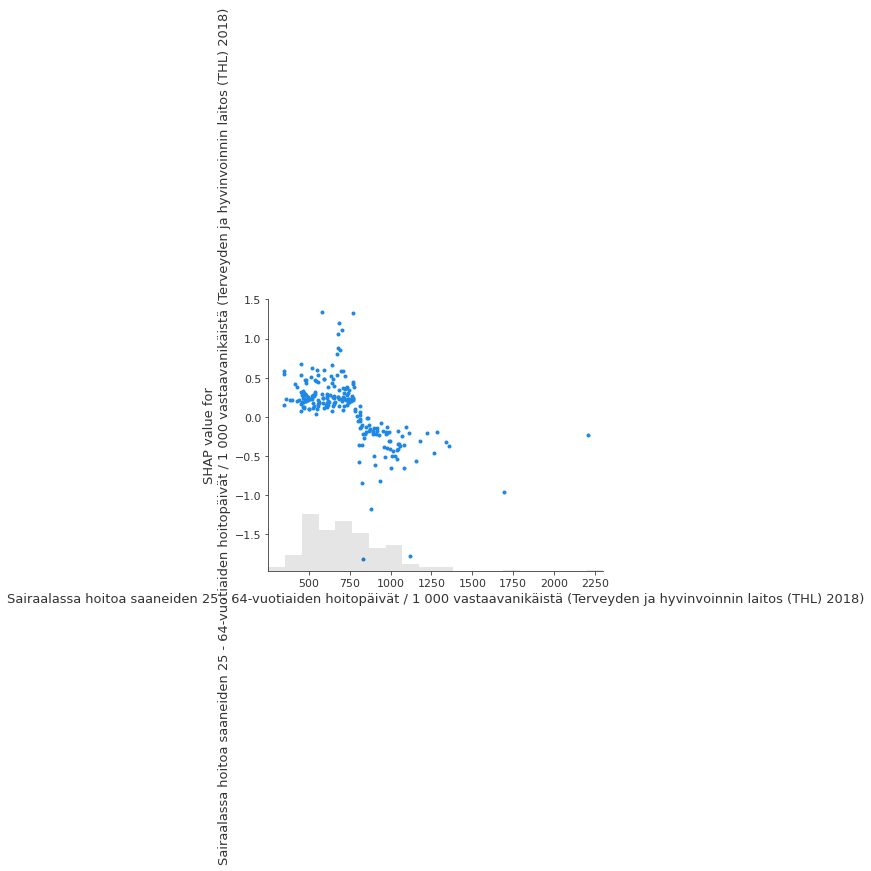

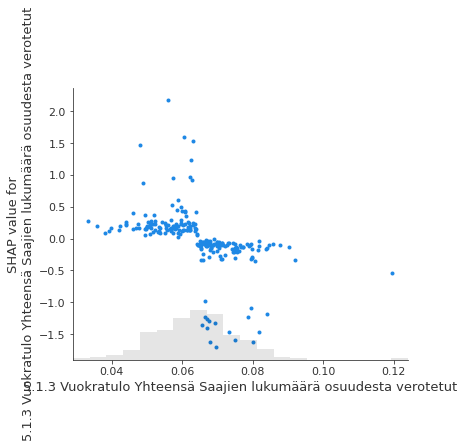

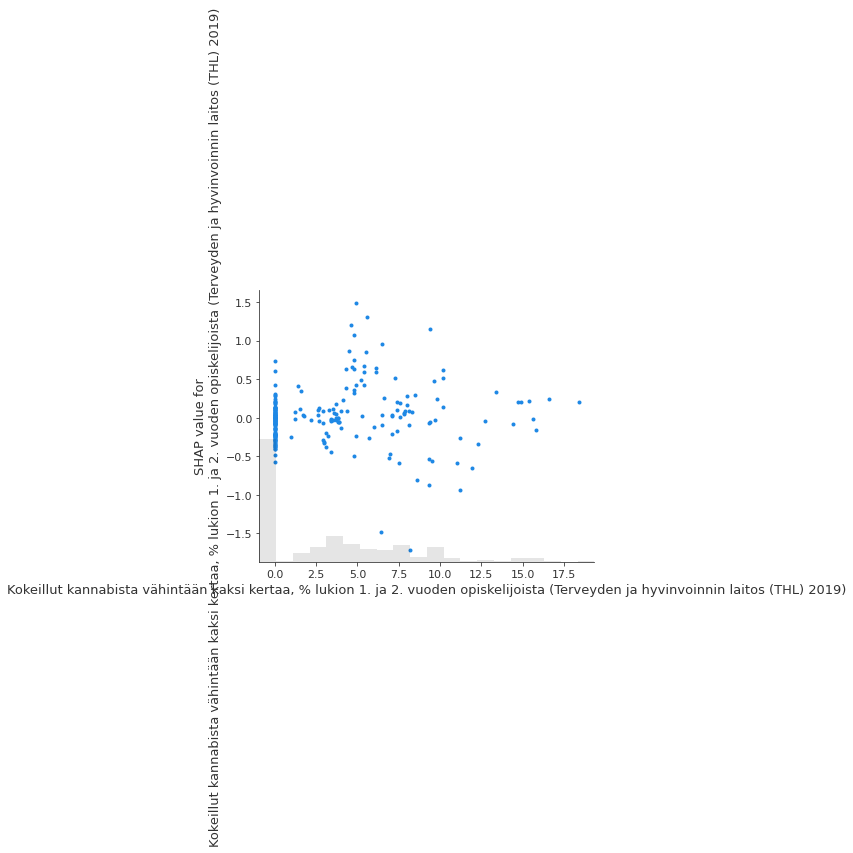

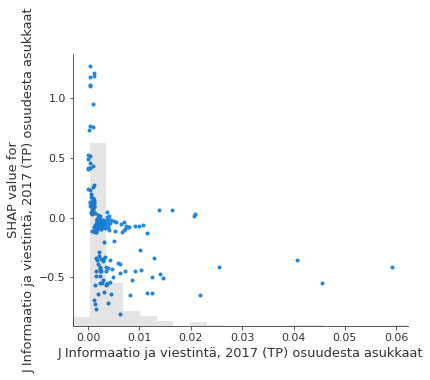

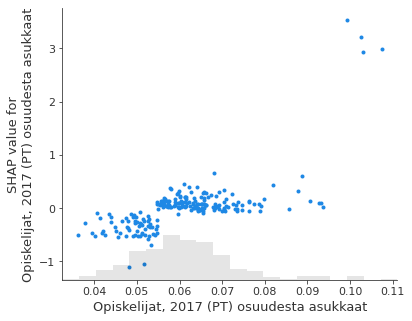

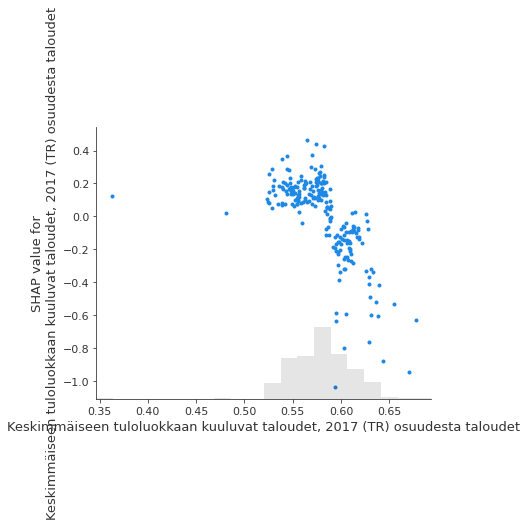

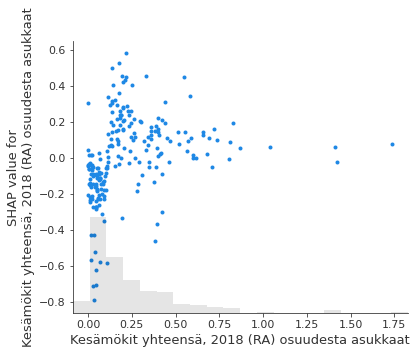

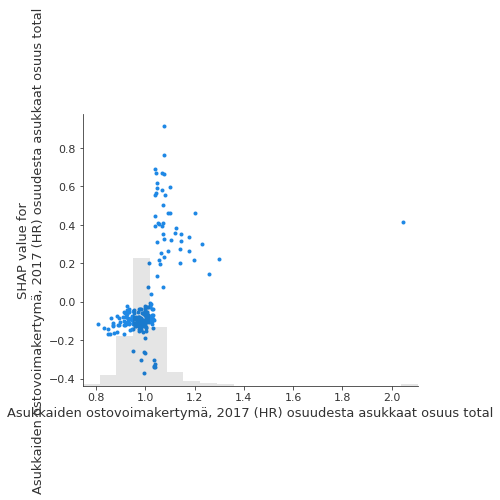

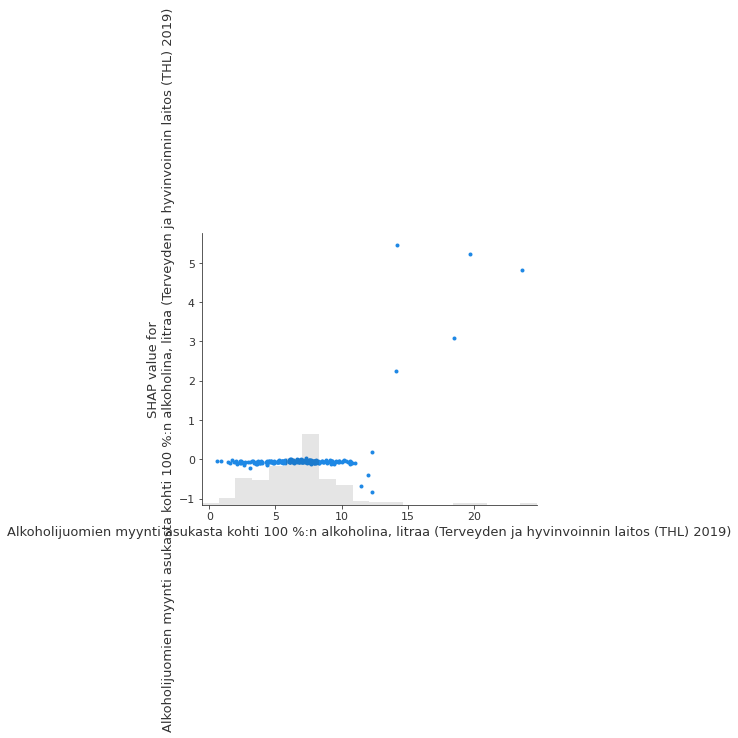

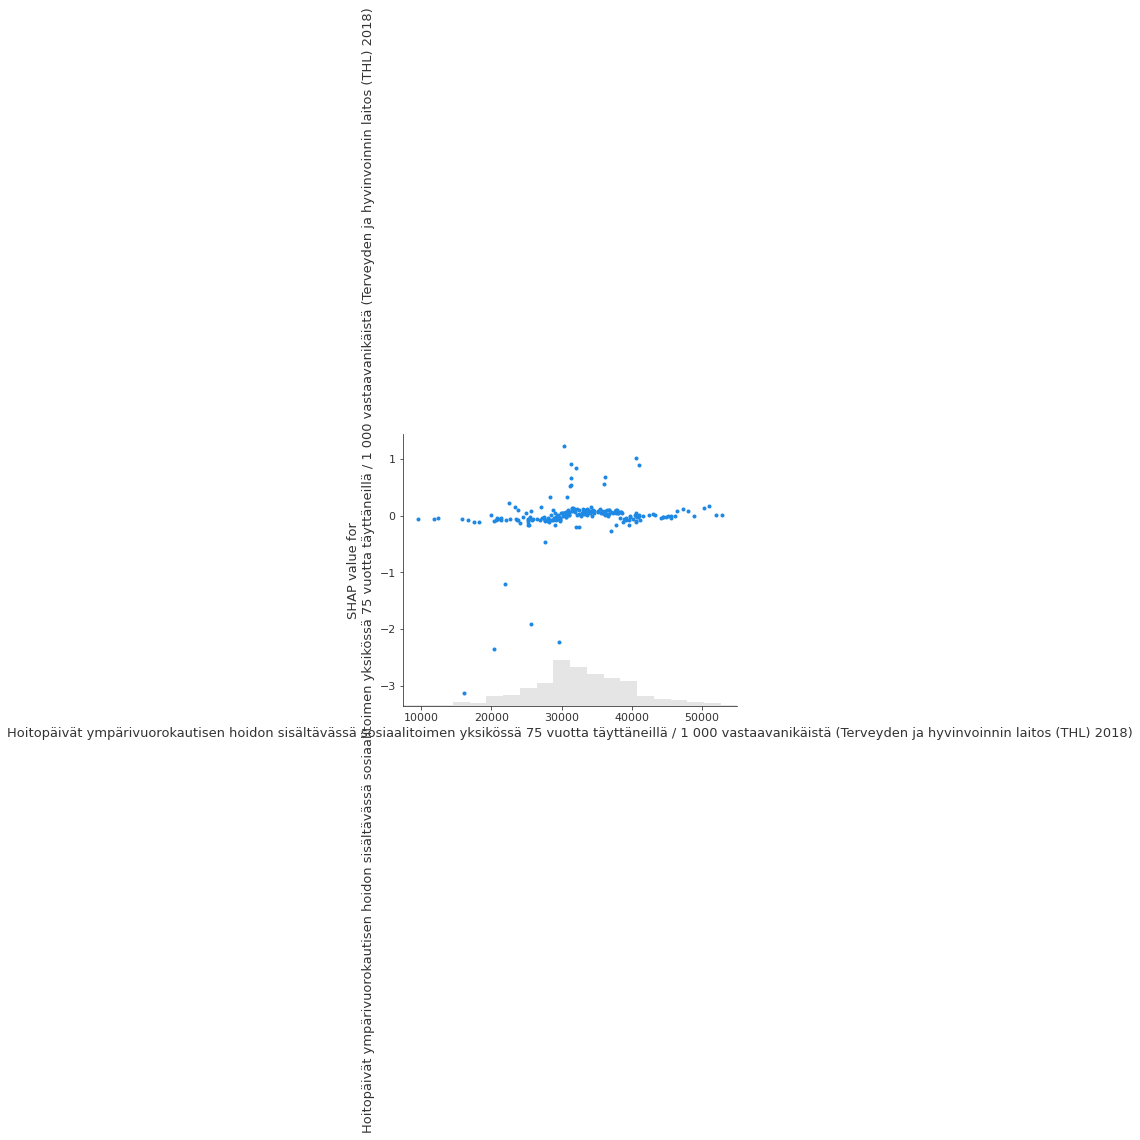

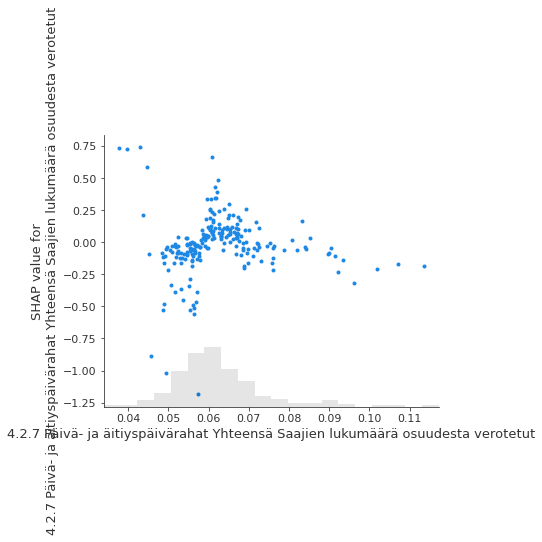

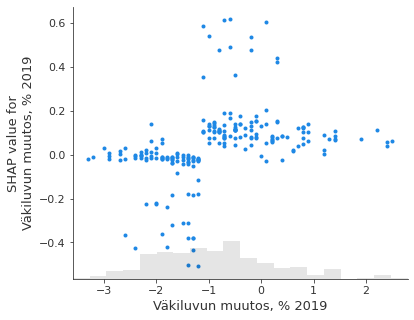

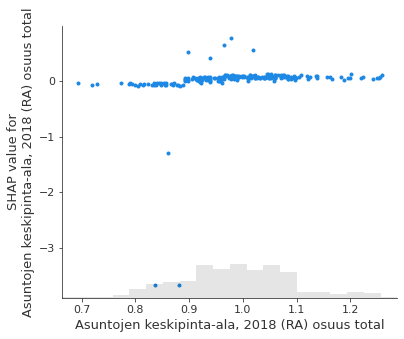

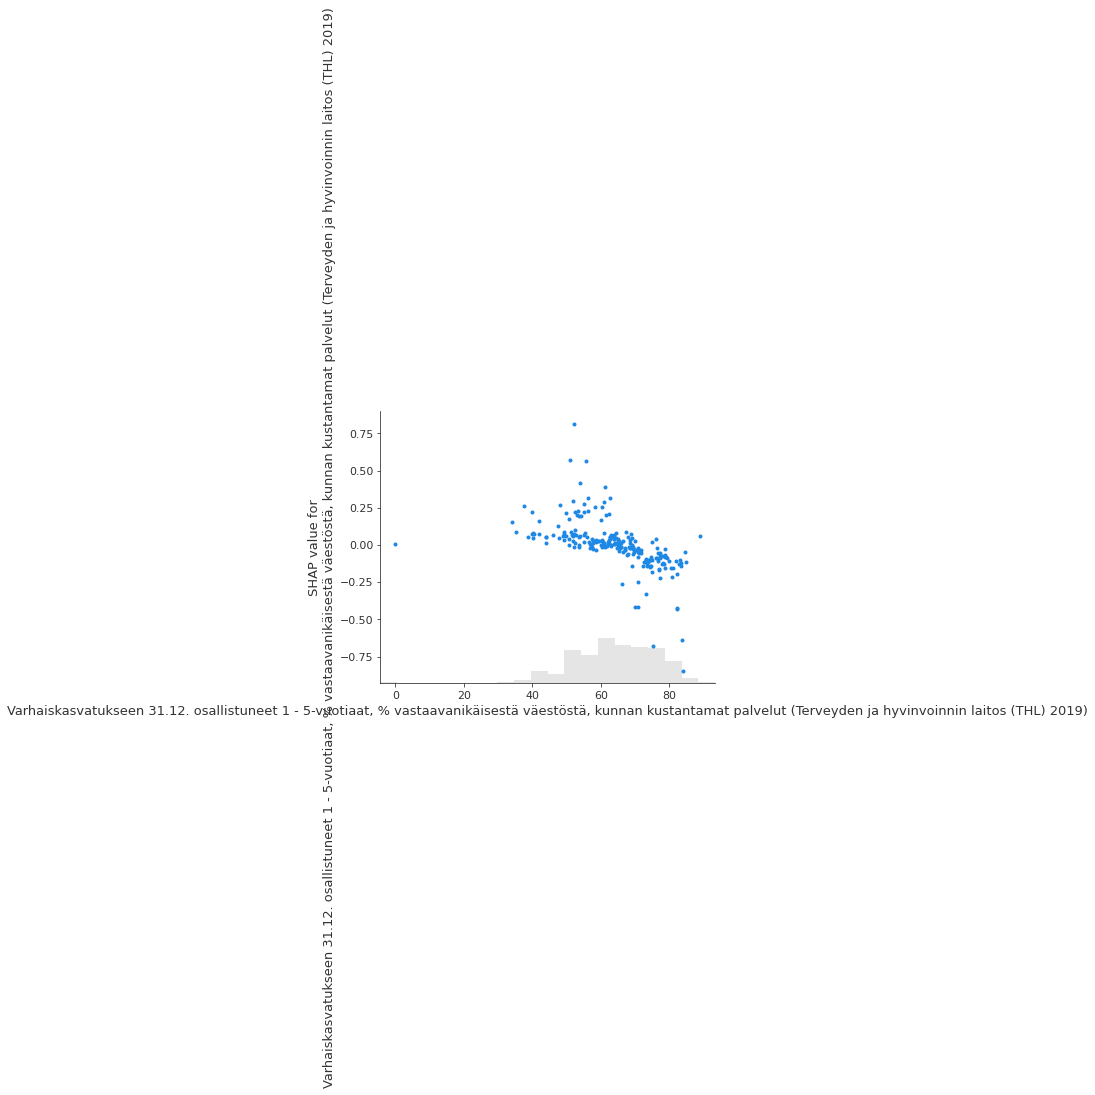

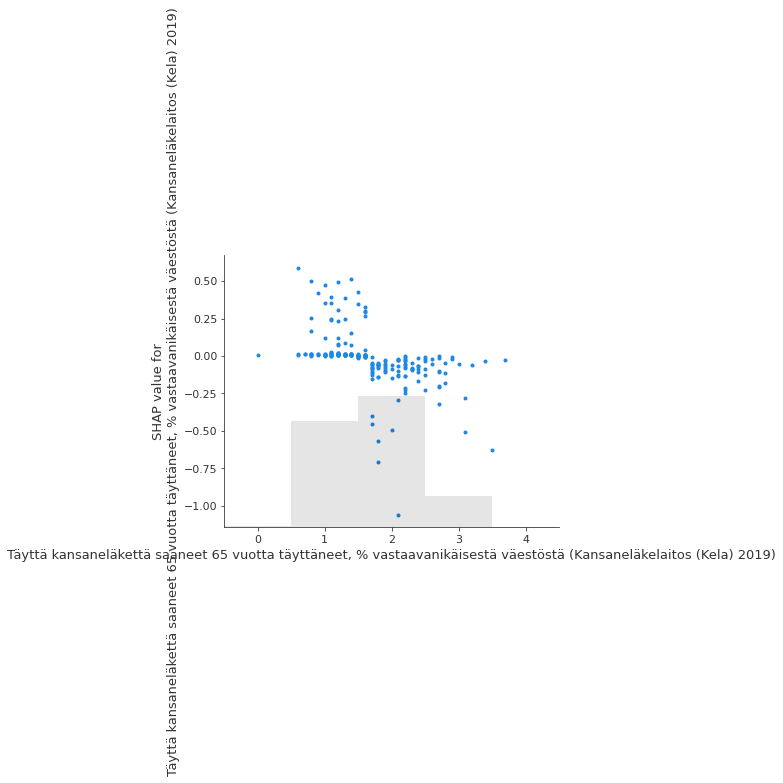

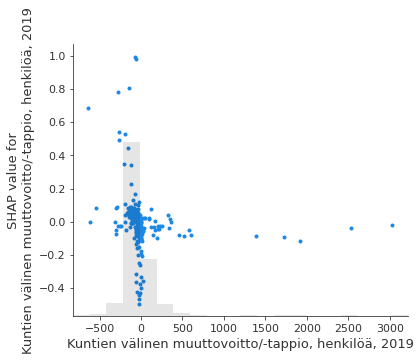

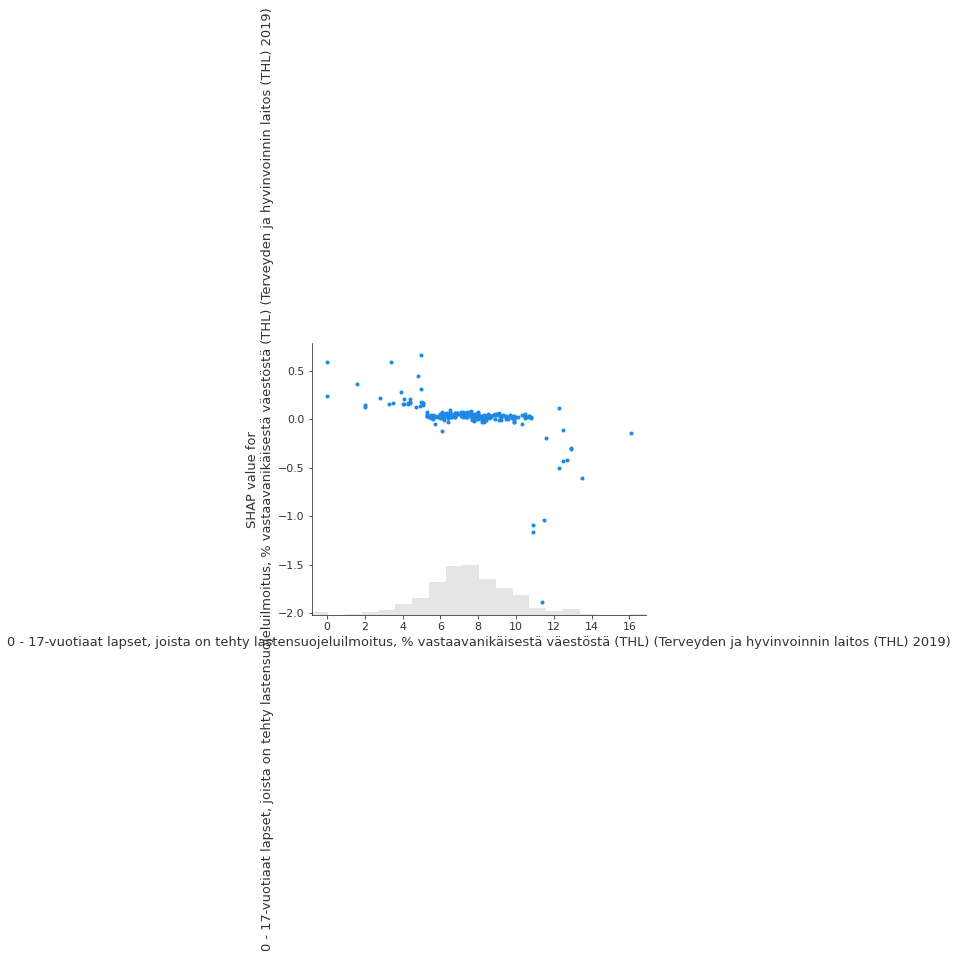

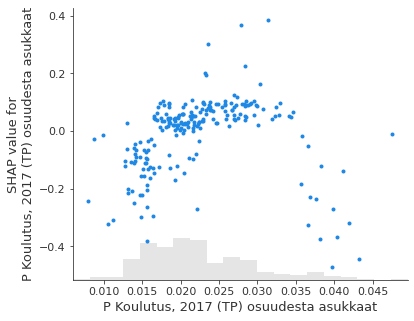

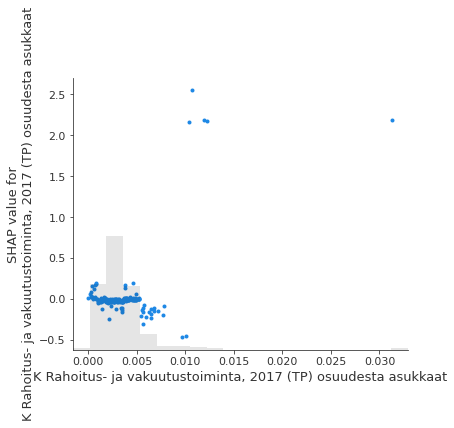

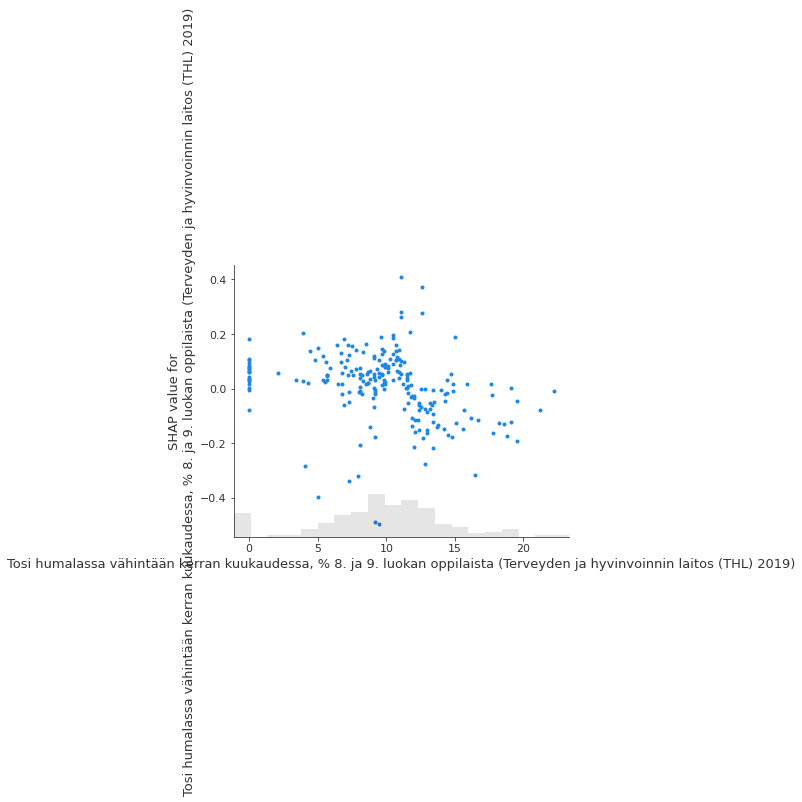

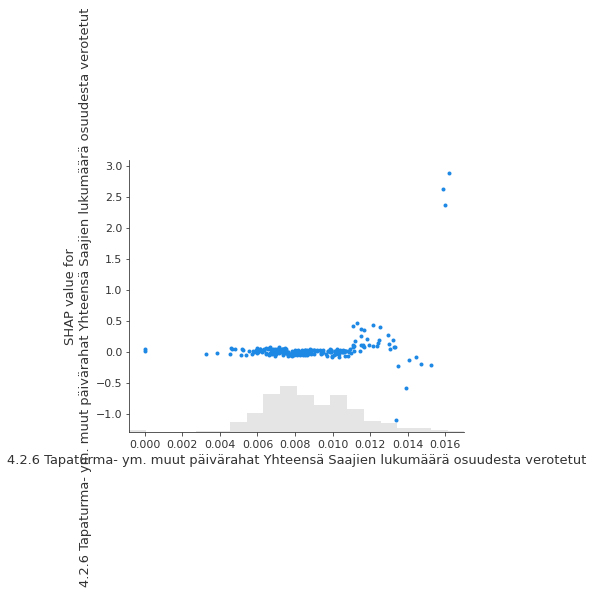

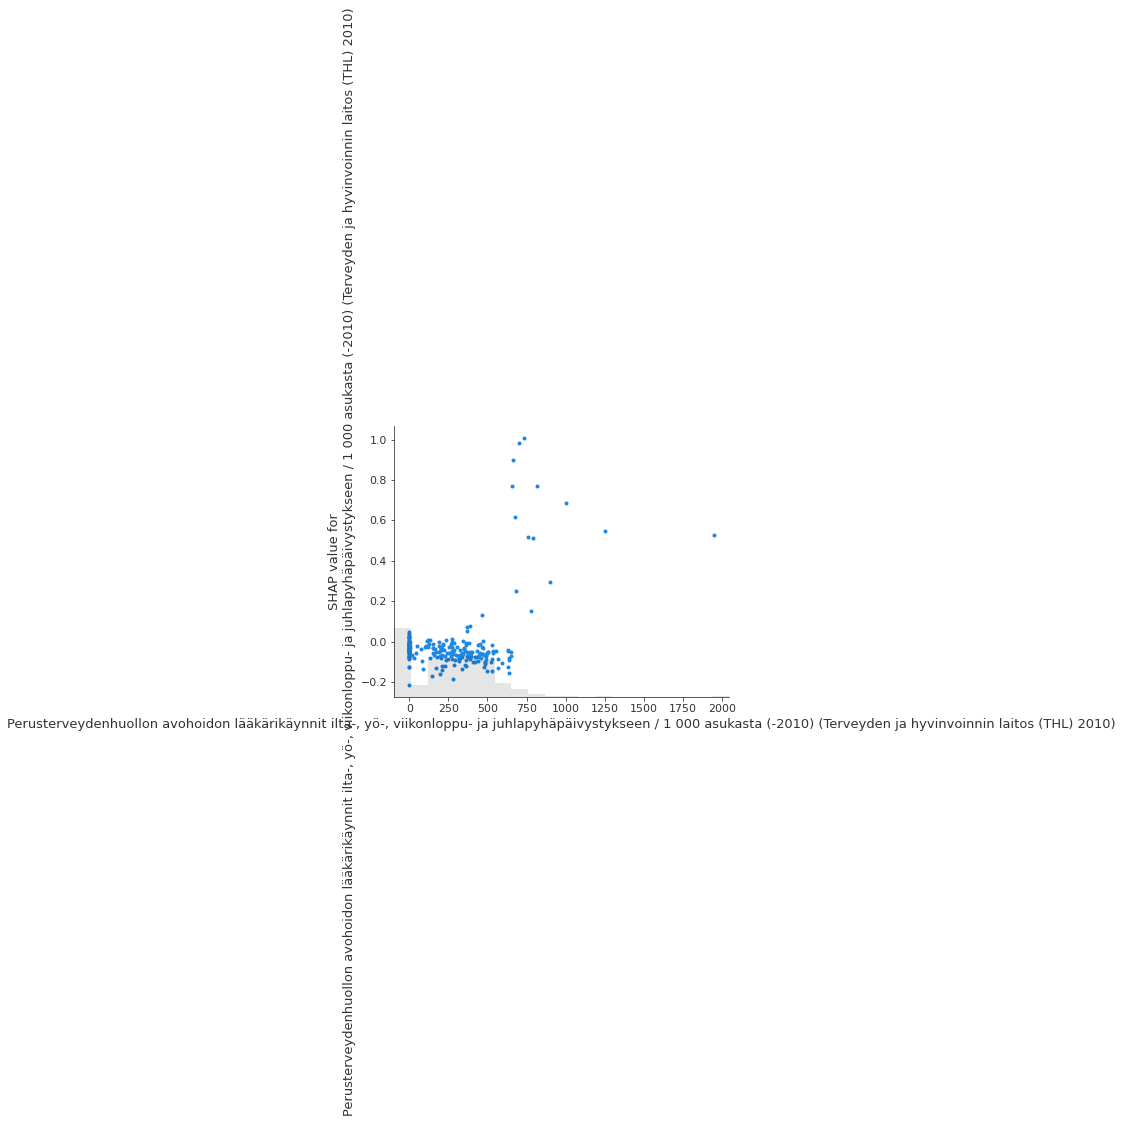

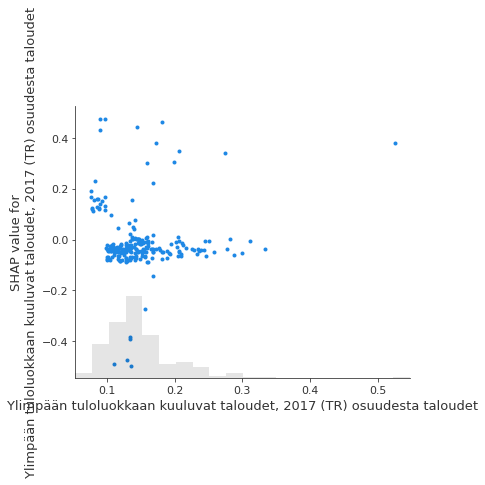

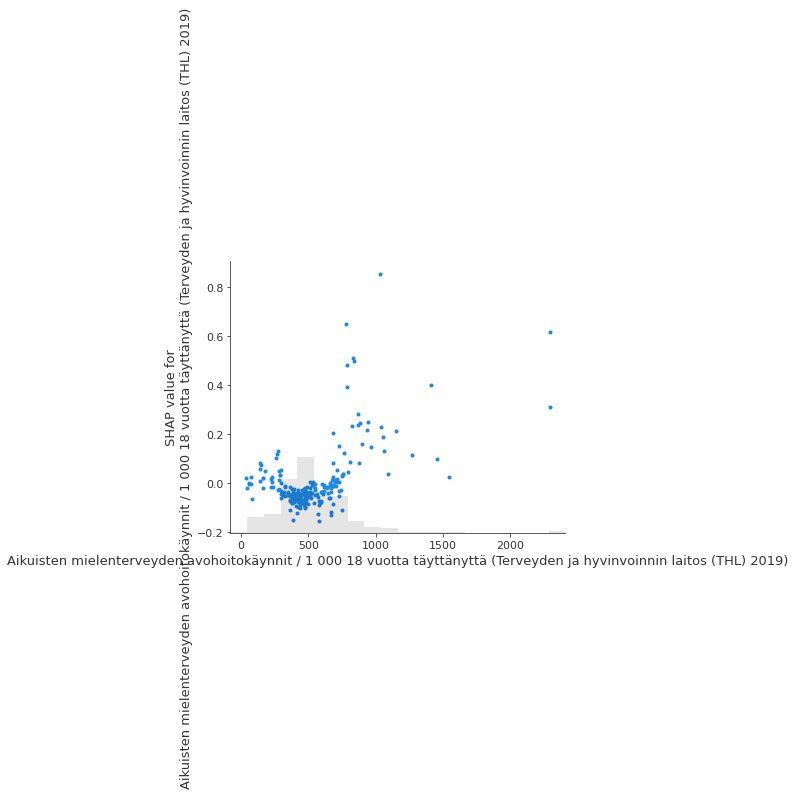

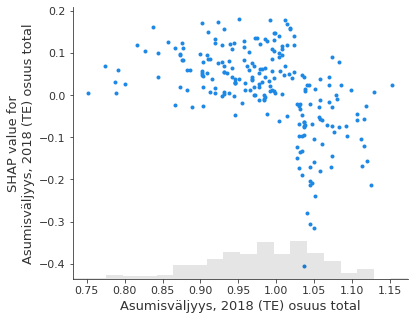

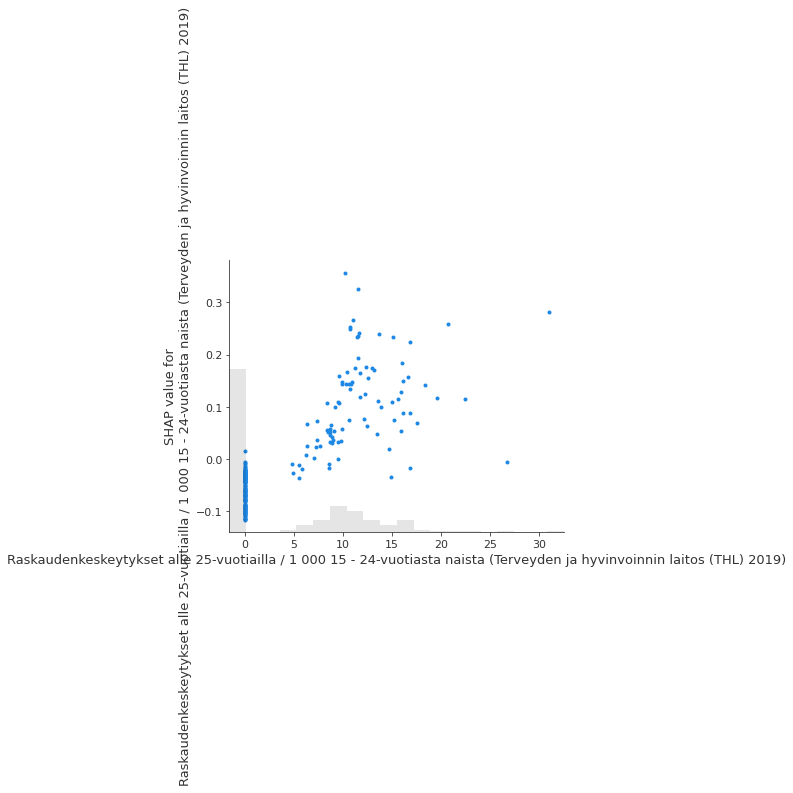

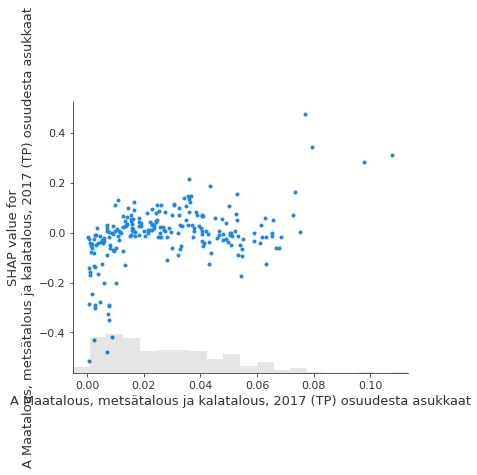

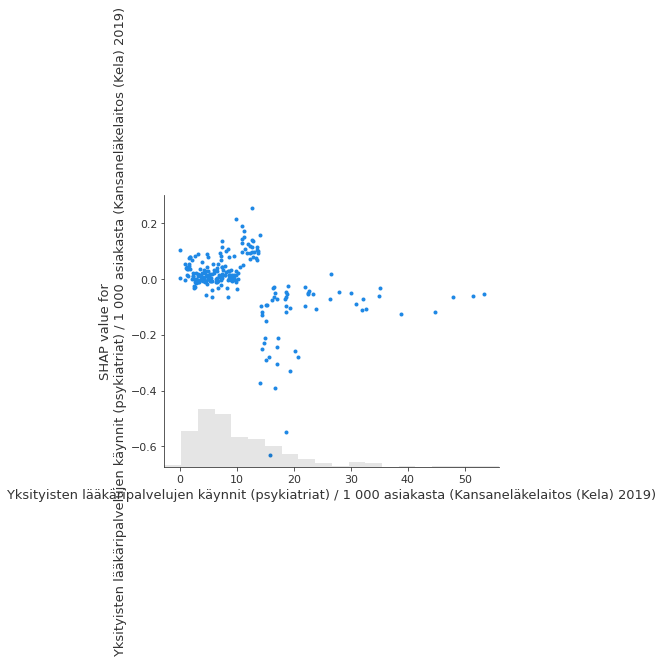

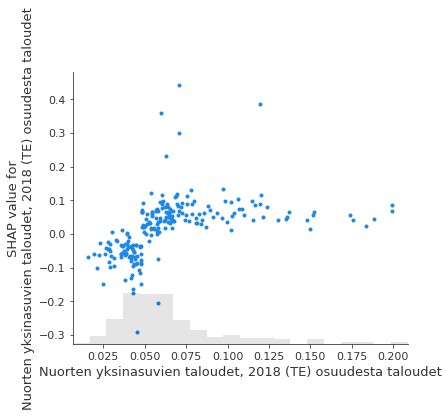

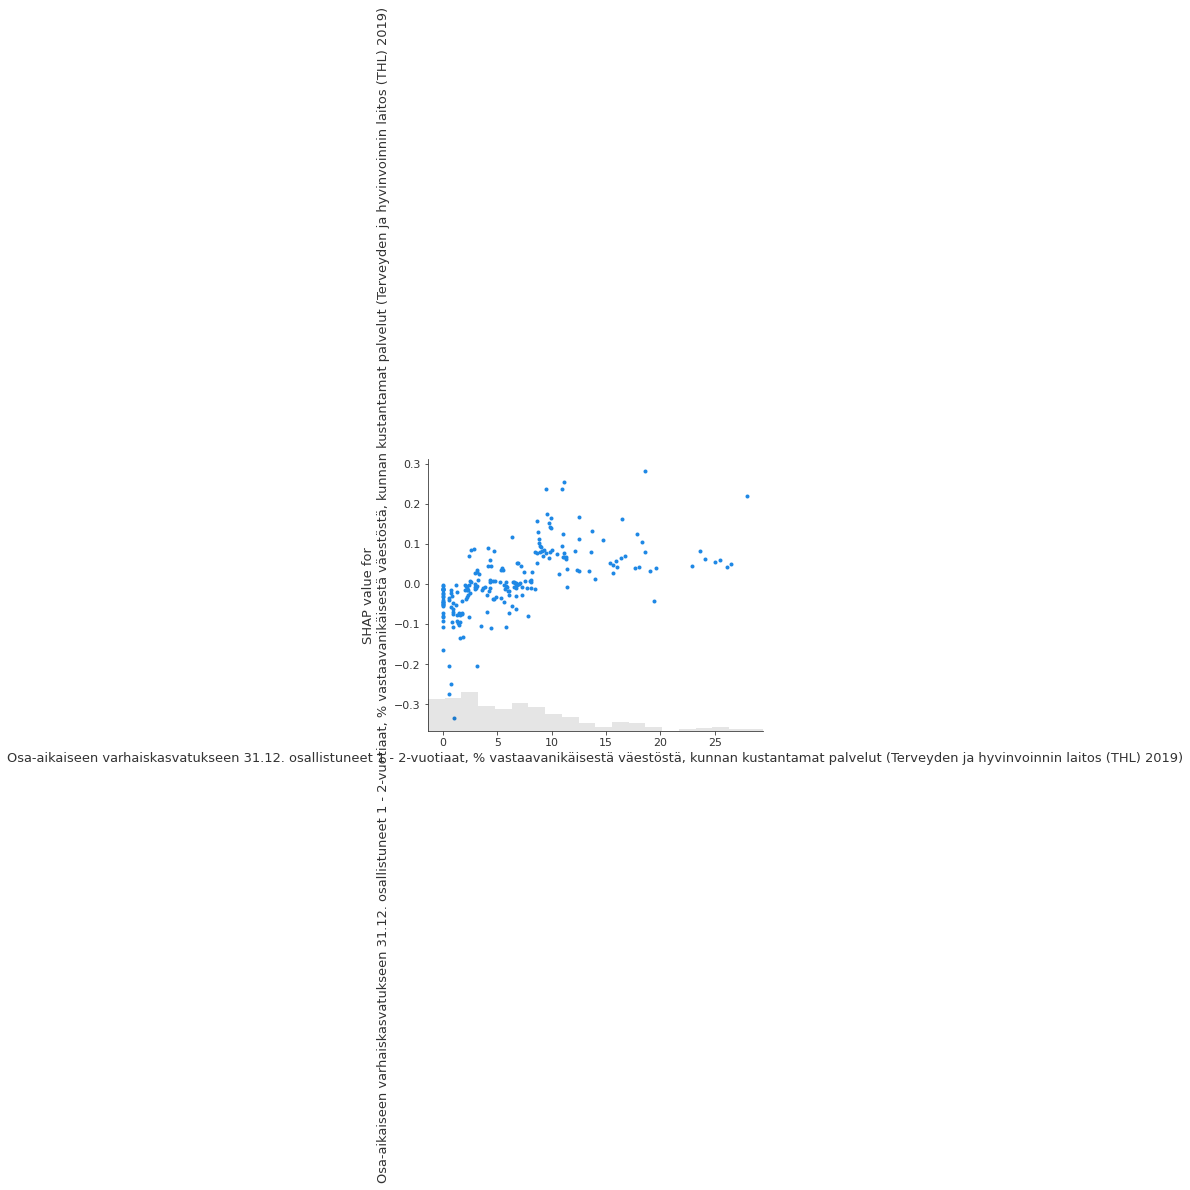

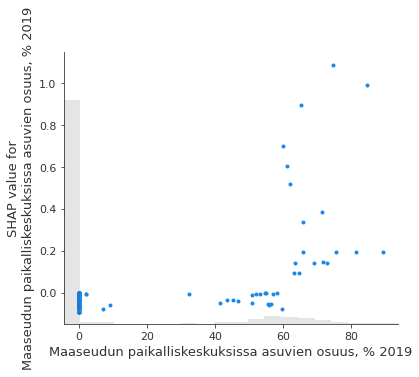

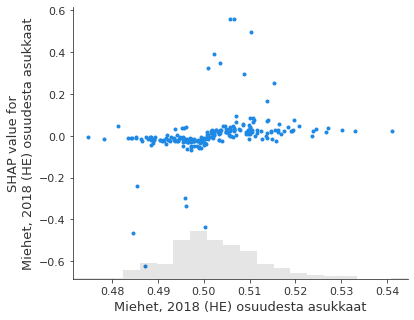

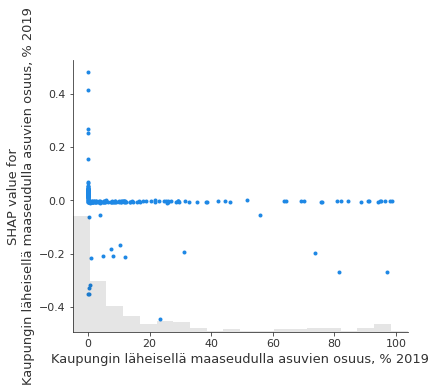

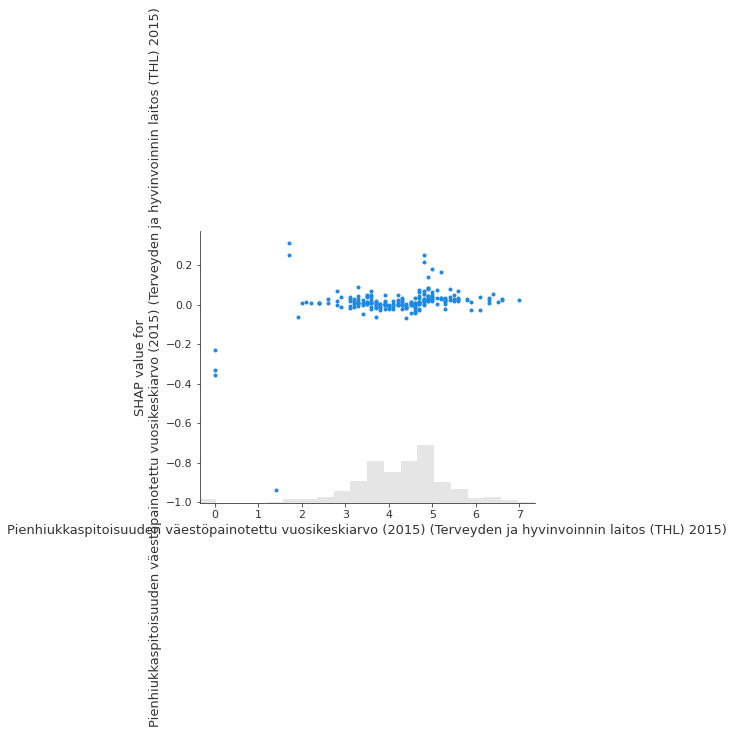

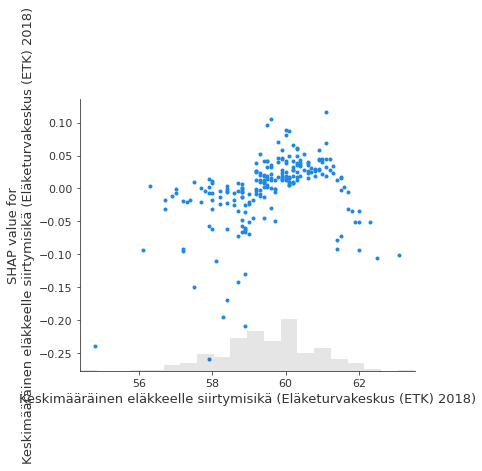

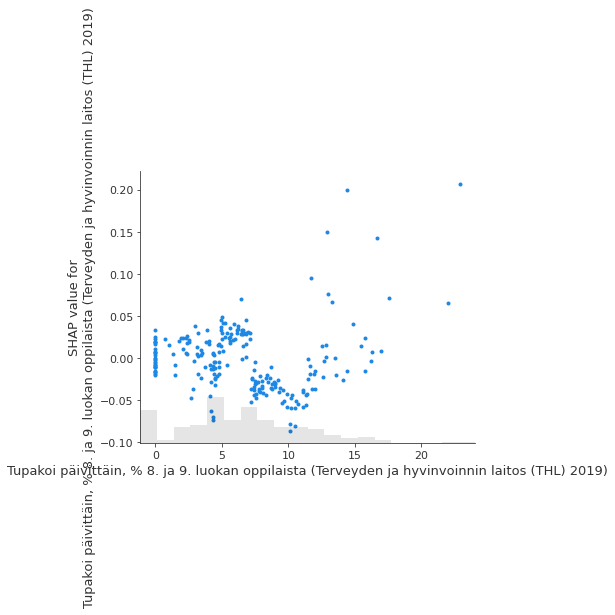

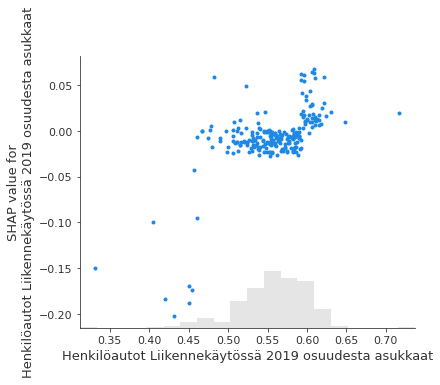

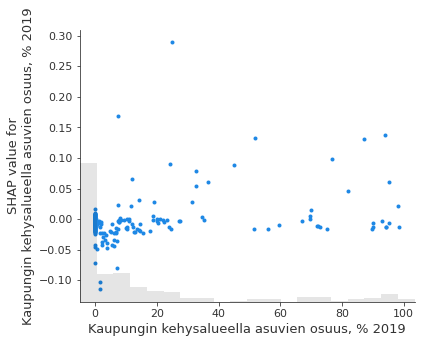

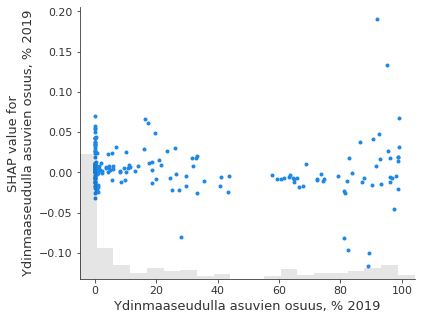

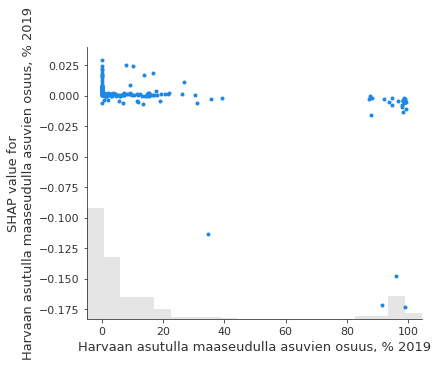

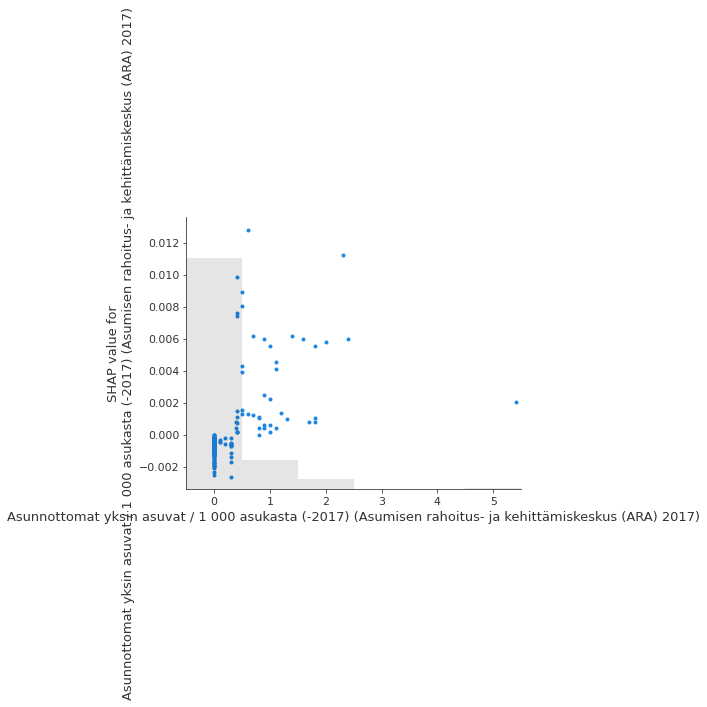

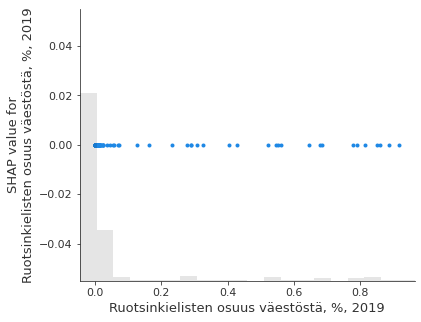

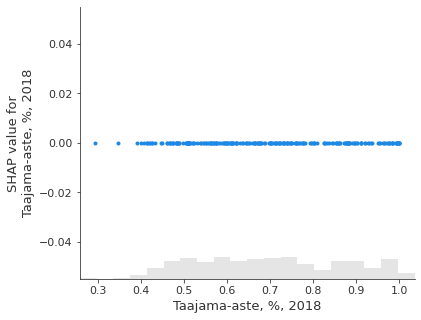

In [27]:
for i in features_dict['Covid_ilmaantuvuus'].sort_values('Shap_permutation_importance', ascending=False)['Feature'].tolist():
    shap.plots.scatter(shap_values_Permutation[:,i])

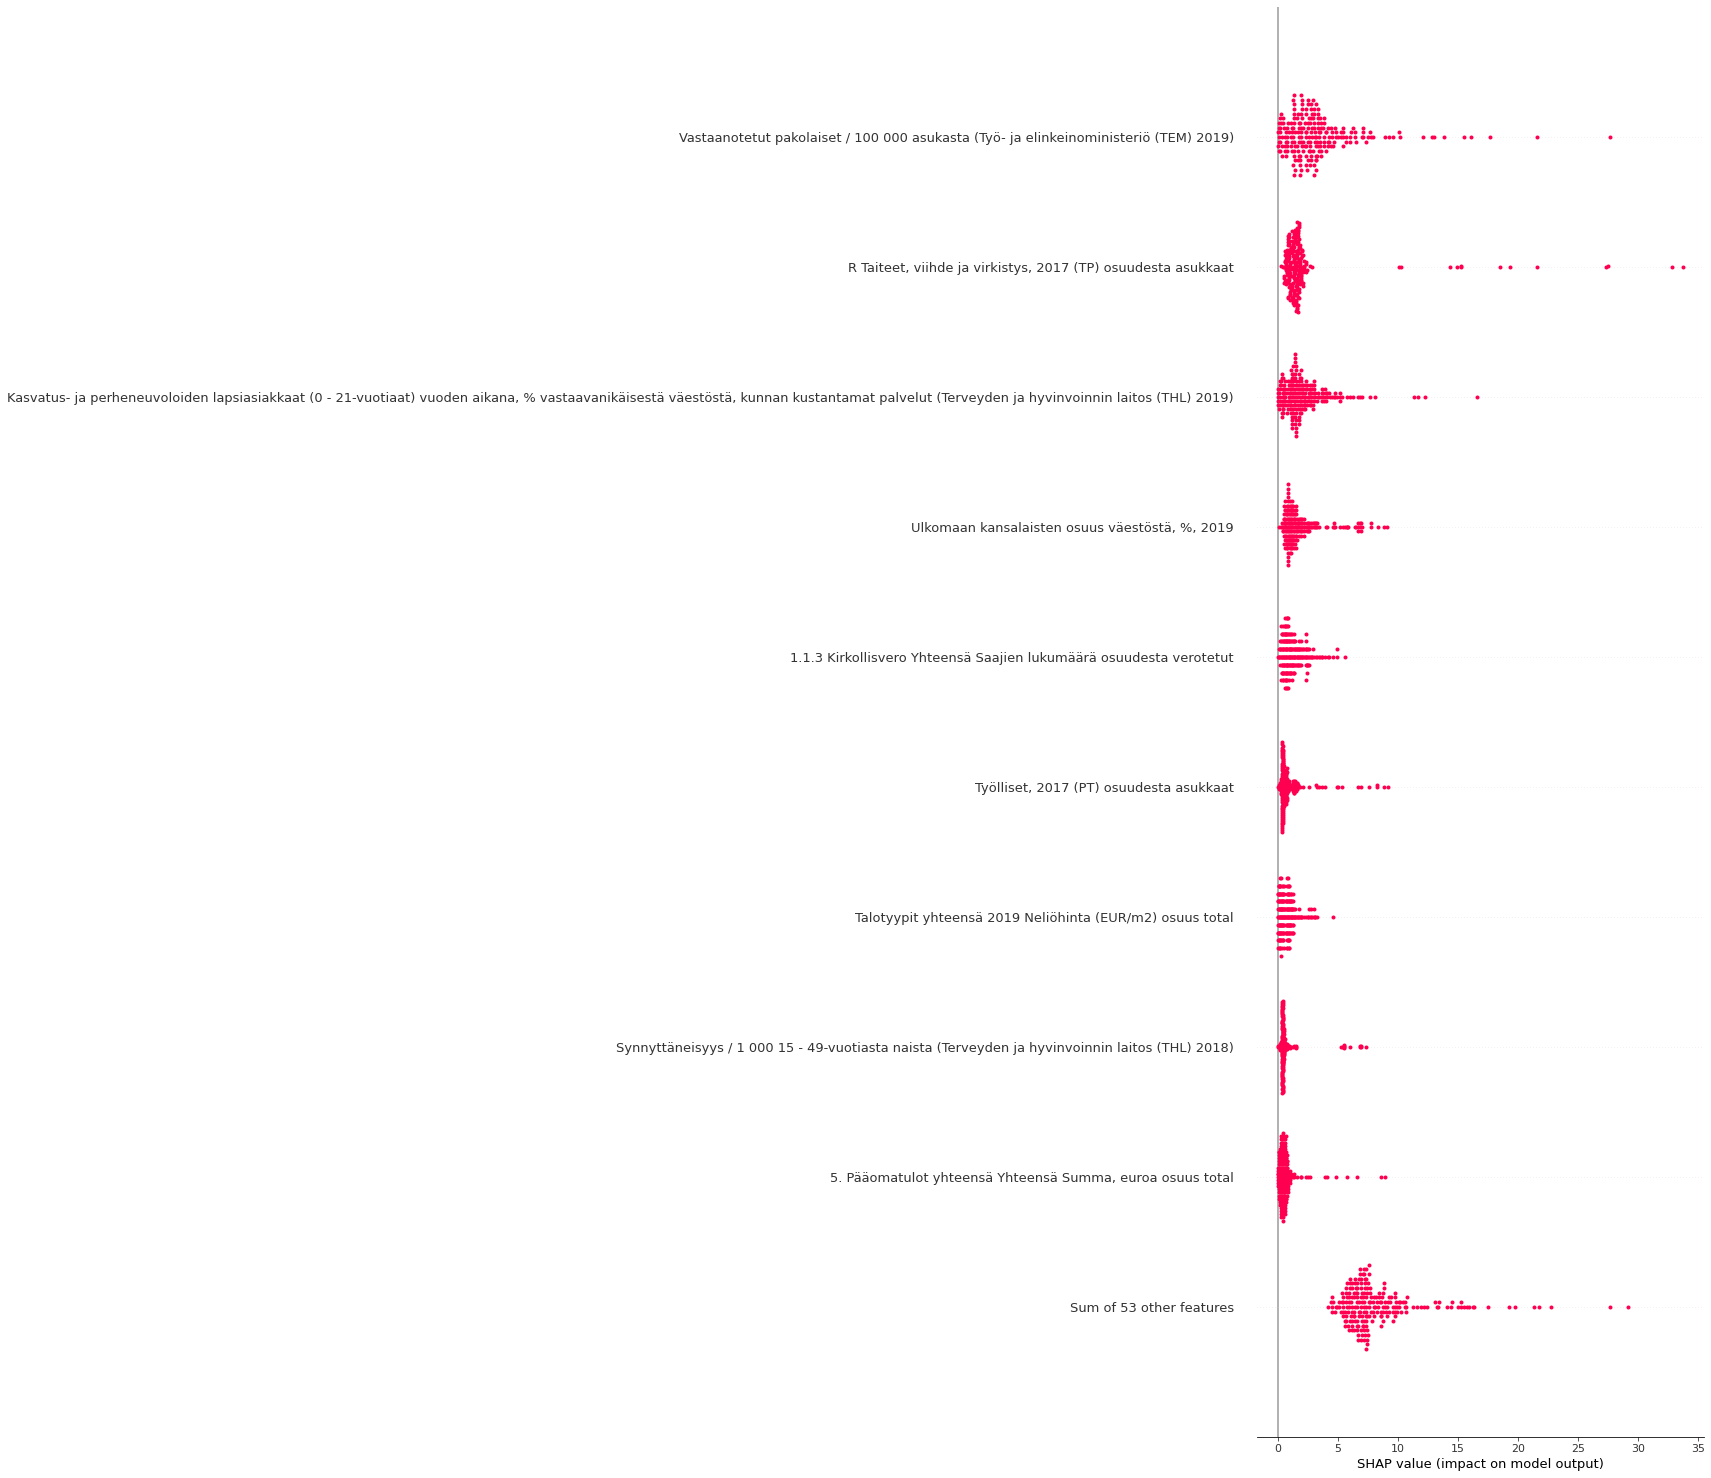

In [36]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")